In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.lines as lns

plt.rcParams['figure.figsize']=(15, 10)

def plot_function(interval,fun):
    a=interval[0]
    b=interval[1]
    
    x=np.linspace(a,b,100)
    y1=fun(x)
    plt.plot(x,y1, linewidth=5)

def plot_tangent(point,k):
    limits=plt.axis()
    x=np.linspace(limits[0],limits[1],100)
    plt.plot(x,point[1]+k*(x-point[0]), linewidth=5)
    
def plot_dotted_lines(x,y,label_x,label_y,limits):
    plt.autoscale(False)
    plt.hlines(y=y, xmin=limits[0], xmax=x,linestyle="--",color="magenta")
    plt.vlines(x=x, ymin=limits[2], ymax=y,linestyle="--",color="magenta")
    plt.text(limits[0],y,label_y,fontsize = 20)
    plt.text(x,limits[2],label_x,fontsize = 20)

def plot_markers(marker_list,labels_x,labels_y,limits):
    for i in range(len(marker_list[0])):
        plt.plot(marker_list[0][i],marker_list[1][i],'o',markersize=15,markerfacecolor='r')
        plot_dotted_lines(marker_list[0][i],marker_list[1][i],labels_x[i],labels_y[i],limits)
                   
def plot_tangents(tangent_list,ode):
    if len(tangent_list) > 0:
        for i in range(len(tangent_list[0])):
            x = tangent_list[0][i]
            y = tangent_list[1][i]
            plot_tangent([x,y],ode(x,y))
    return plt.axis()
                   
def plot_euler_step(x0,y0,step,ode):
    [x0,x1,y0,y1]=get_values_euler(x0,y0,step,ode)
     
    plot_function([x0-0.05,x1+0.05],fun)
    
    tangent_list=[[x0],[y0]]
    limits=plot_tangents(tangent_list,ode)
    
    marker_list=[[x0,x1],[y0,y1]]
    labels_x =['X_0','X_0+h']
    labels_y =['Y_0','y_1']
    plot_markers(marker_list,labels_x,labels_y,limits) 

def get_values_euler(x0,y0,step,ode):
    x1 = x0 + step
    y1 = y0 + step*ode(x0, y0)
    return [x0,x1,y0,y1]

def plot_mp_step(x0,y0,step,ode,method_st):
    [x0,x1_2,x1,y0,y1_2,y1] = get_values_mp(x0,y0,step,ode)
    
    plot_function([x0-0.05,x1+0.05],fun)
    
    tangent_list=[[x0],[y0]]
    marker_list=[[x0,x1_2],[y0,y1_2]]
    labels_x =['X_0','X_0+1/2*h']
    labels_y =['Y_0','y_1/2']
    
    if method_st == 2:
        tangent_list=[[x1_2],[y1_2]]
        marker_list=[[x0,x1_2],[y0,y1_2]]
        labels_x =['X_0','X_0+1/2*h']
        labels_y =['Y_0','y_1/2']
    elif method_st == 3:
        tangent_list=[[x1_2],[y1_2]]
        marker_list=[[x0,x1_2,x1],[y0,y1_2,y1]]
        labels_x =['X_0','X_0+h/2','X_1=X_0+h']
        labels_y =['Y_0','y1/2','Y_1']
        ln=lns.Line2D(xdata=[x0,x1],ydata=[y0,y1],linewidth=5,color='black')
        ax = plt.gca()
        ax.add_line(ln)
  
    limits=plot_tangents(tangent_list,ode)
    plot_markers(marker_list,labels_x,labels_y,limits)

def get_values_mp(x0,y0,step,ode):
    x1_2 = x0 + step/2
    x1 = x0 + step
    y1_2 = y0 + step/2 * ode(x0, y0)
    y1 = y0 + step * ode(x1_2, y1_2)
    return [x0,x1_2,x1,y0,y1_2,y1]


def plot_heun_step(x0,y0,step,ode,method_st):
    [x0,x1,y0,y1_0,y1] = get_values_heun(x0,y0,step,ode)
    
    plot_function([x0-0.05,x1+0.05],fun)
    
    tangent_list=[[x0],[y0]]
    marker_list=[[x0,x1],[y0,y1_0]]
    labels_x =['X_0','X_0+h']
    labels_y =['Y_0','y_1_0']
    
    if method_st == 2:
        tangent_list=[[x0,x1],[y0,y1_0]]
        marker_list=[[x0,x1],[y0,y1_0]]
        labels_x =['X_0','X_0+h']
        labels_y =['Y_0','y_1_0']
    elif method_st == 3:
        tangent_list=[[x0,x1],[y0,y1_0]]
        marker_list=[[x0,x1,x1],[y0,y1_0,y1]]
        labels_x =['X_0','X_1=X_0+h','X_1=X_0+h']
        labels_y =['Y_0','y_{0,1}','Y_1']
        ln=lns.Line2D(xdata=[x0,x1],ydata=[y0,y1],linewidth=5,color='black')
        ax = plt.gca()
        ax.add_line(ln)

    limits=plot_tangents(tangent_list,ode)
    plot_markers(marker_list,labels_x,labels_y,limits)

def get_values_heun(x0,y0,step,ode):
    x1 = x0 + step
    y1_0 = y0 + step*ode(x0, y0)
    
    y1 = y0 + step/2*(ode(x0, y0)+ode(x1, y1_0))
    return [x0,x1,y0,y1_0,y1]


def get_values_rk4(x0, y0, step, ode):
    x1_2 = x0 + step/2
    x1 = x0 + step
    
    k1 = step*ode(x0, y0)
    y1_2_1 = y0 + 1/2*k1
    
    k2 = step*ode(x1_2, y1_2_1)
    y1_2_2 = y0 + 1/2*k2
    
    k3 = step*ode(x1_2, y1_2_2)
    y1_1 = y0 + k3
    
    k4 = step*ode(x1, y1_1)
    y1 = y0 + 1/6*(k1+2*k2+2*k3+k4)
    
    return [x1, x1_2 , y1_2_1, y1_2_2, y1_1, y1]


def plot_rk4_step(x0,y0,step,ode,method_st):
    [x1, x1_2 , y1_2_1, y1_2_2, y1_1, y1] = get_values_rk4(x0,y0,step,ode)
    
    plot_function([x0-0.05,x1+0.05],fun)
    
    tangent_list=[[x0],[y0]]
    marker_list=[[x0,x1_2],[y0,y1_2_1]]
    labels_x =['X_0','X_0+1/2*h']
    labels_y =['Y_0','y_1/2']
    
    if method_st == 2:
         tangent_list=[[x1_2],[y1_2_1]]
    elif method_st == 3:
        tangent_list=[]
        marker_list=[[x0,x1_2],[y0,y1_2_2]]
        labels_x =['X_0','X_1=X_0+1/2h']
        labels_y =['Y_0','y_1/2_1']
        ln=lns.Line2D(xdata=[x0,x1_2],ydata=[y0,y1_2_2],linewidth=5,color='black')
        ax = plt.gca()
        ax.add_line(ln)
    elif method_st == 4:
        tangent_list=[[x1_2],[y1_2_2]]
        marker_list=[[x0,x1_2],[y0,y1_2_2]]
        labels_x =['X_0','X_1=X_0+1/2h']
        labels_y =['Y_0','y_1/2_1']
    elif method_st == 5:
        tangent_list=[]
        marker_list=[[x0,x1],[y0,y1_1]]
        labels_x =['X_0','X_1=X_0+h']
        labels_y =['Y_0','y1_1']
        ln=lns.Line2D(xdata=[x0,x1],ydata=[y0,y1_1],linewidth=5,color='black')
        ax = plt.gca()
        ax.add_line(ln)
    elif method_st == 6:
        tangent_list=[[x1],[y1_1]]
        marker_list=[[x0,x1],[y0,y1_1]]
        labels_x =['X_0','X_1=X_0+h']
        labels_y =['Y_0','y1_1']
    elif method_st == 7:
        tangent_list=[]
        marker_list=[[x0,x1],[y0,y1_1]]
        labels_x =['X_0','X_1=X_0+h']
        labels_y =['Y_0','y1']
        ln=lns.Line2D(xdata=[x0,x1],ydata=[y0,y1],linewidth=5,color='black')
        ax = plt.gca()
        ax.add_line(ln)
             
    limits=plot_tangents(tangent_list,ode)
    plot_markers(marker_list,labels_x,labels_y,limits)

def plot_rk4_all(x0,y0,step,ode):
    [x1, x1_2 , y1_2_1, y1_2_2, y1_1, y1] = get_values_rk4(x0,y0,step,ode)
    
    plot_function([x0,x1],fun)
    
    tangent_list=[[x0,x1_2,x1_2,x1],[y0,y1_2_1,y1_2_2,y1_1]]
    marker_list=[[x0,x1_2,x1_2,x1,x1],[y0,y1_2_1,y1_2_2,y1_1,y1_1]]
    labels_x =['X_0','X_0+1/2*h','X_0+1/2*h','X_1=X_0+h','X_1=X_0+h']
    labels_y =['Y_0','y_1/2','y_1/2_1','y1_1','y1']
             
    limits=plot_tangents(tangent_list,ode)
    plot_markers(marker_list,labels_x,labels_y,limits)
    
    plt.gca().get_lines()[1].set_color("red")
    plt.gca().get_lines()[2].set_color("green")
    plt.gca().get_lines()[3].set_color("yellow")
    plt.gca().get_lines()[4].set_color("black")
    
    plt.plot([], [], ' ', label="Crvena - K1 - tangenta u (X0,y0)")
    plt.plot([], [], ' ', label="Zelena - K2 - tangenta u (X_0+1/2*h,y_1/2)")
    plt.plot([], [], ' ', label="Zuta - K3 - tangenta u (X_0+1/2*h,y_1/2_1)")
    plt.plot([], [], ' ', label="Crna - K4 - tangenta u (X_0+h,y1_1)")
    plt.legend(prop={"size":16})
    
def calculate_error(x0,xn,y0,ode,fun,min_st_size,method):
    step = 1
    errors=[]
    sub_intervals=[]
    while(step >= min_st_size):
        x = np.arange(x0,xn+step,step)
        y = method(x0,xn,y0,step,ode)
        errors.append(np.mean(np.abs(fun(x)-y)))
        sub_intervals.append(step)
        step = step / 2
    
    plt.plot(np.arange(0,len(errors)),errors, linewidth = 5)
    plt.xlabel('Indeks i greska, za koju vazi: h=1/2**{i-1}. Npr. za i=1 je h=1, za i=2 je h=1/2 itd.', fontsize=18)
    plt.ylabel('Greska', fontsize=18)
    
    return [errors,sub_intervals]

def linterp(x,y):
    n = len(x)
    p = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L = np.convolve(np.array([1, -x[j]])/(x[i]-x[j]), L)
        p = p + y[i]*L
    return p

def ojler(x0,xn,y0,h,odj):
    x = np.arange(x0,xn+h,h)
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1,n):
        y[i] = y[i-1] + h * odj(x[i-1], y[i-1])
    return y


# Numeričke metode za rešavanje Običnih Diferencijalnih Jednačina (ODJ)
# Problem Početnih Vrednosti (PPV)
## Šta su diferencijalne jedančine?
#### Diferencijalna jedančina je jedančina koja povezuje funkciju i njene izvode.
#### Red diferencijalne jedančine zavisi od reda izvoda. Diferencijalne jednačine prvog reda uključuju prve izvode, drugog reda druge, itd.
#### Izvod $\frac{dx}{dy}$ se naziva „običnim“ ukoliko je $y$ funkcija samo jedne nezavisne promenljive $x$. U slučaju kada imamo funkciju $f(x,y)$ koja je funkcija više nezavisnih promenljivih $x$ i $y$, izvodi $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$ se nazivaju „parcijalnim“ izvodima. Slično, imamo podelu na „obične“ i „parcijalne“ diferencijalne jednačine.
#### Obične diferencijalne jednačine sadrže jedan ili više običnih izvoda nepoznatih funkcija.
#### Diferencijalne jednačine se jako puno koriste za formiranje matematičkih modela različitih pojava u prirodi. Formule za mnoge zakone fizike su diferencijalne jednačine.
#### Na primer, Njutnov drugi zakon kretanja:
#### $$F=ma, \hspace{0.5em} a=\frac{dv}{dt}, \hspace{0.5em} v=\frac{dx}{dt}$$
#### gde $F$ predstavlja silu, $m$ masu, $a$ ubrzanje, $dv$ promenu brzine, $dt$ promenu vremena, a $dx$ promenu položaja. Rešavanjem sledeće jednačine dobijamo funkciju brzine po vremenu:
#### $$F(t,v)=m\frac{dv}{dt}$$
#### a rešavanjem sledeće jednačine dobijamo funkciju promene položaja po vremenu:
#### $$F(t,x,\frac{dx}{dt})=m\frac{d^2x}{d^2t}$$
#### Ove jednačine su nam često od velike koristi kada nam je potrebno da uvedemo fiziku u video igre.
#### Na ovom predavanju bavićemo se običnim diferencijalnim jedančinama prvog reda, pa u nastavku dajemo nekoliko primera.
#### $$ x+y'=e^x\\\frac{dy}{dx}+2y^2+x=1\\y'=e^x$$
## Početni uslovi
#### Ako uzmemo na primer diferencijalnu jedančinu:
#### $$y'=e^x$$
#### rešenja su sve funkcije oblika:
#### $$y(x)=e^x + C$$
#### gde je $C$ proizvoljna konstanta. Ako želimo da imamo jedinstveno rešenje, tj. jednu funkciju onda moramo da zadamo neki uslov koji ta funkcija treba da zadovoljava. To se zove početni uslov. Na primer, za prethodni primer možemo da zadamo $y(0)=1$ i tada dobijamo da je jedinstevno rešenje:
#### $$y(x)=e^x$$
## Numeričke metode za rešavanje ODJ
## Tejlorov red
#### Tejlorov red biće nam osnova za objašnjavanje svih metoda koje ćemo pokazati na ovom predavanju.
#### Tejlorov red za neku funkciju $f(x)$ u okolini neke tačke $x_0$ definisan je sa:
#### $$f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{1}{2}f''(x_0)(x-x_0)^2+\frac{1}{3!}f^{(3)}(x_0)(x-x_0)^3+...$$
#### Ako uzmemo da je $x=x_0+h$, Tejlorov red ima sledeći oblik:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+\frac{1}{3!}f^{(3)}(x_0)h^3+...$$
#### Ovaj drugi oblik ćemo koristiti tokom predavanja jer će nam cilj biti da procenimo vrednosti funkcije $f(x)$ u nekoj tački $x_0+h$ koja je za neki (obično mali) korak $h$ udaljena od $x_0$. Tačka $x_0$ zadata nam je iz početnog uslova. 
## Ojlerov metod
#### Najejdnostavniji numerički metod za rešavanje ODJ.
#### Oslanja se na korišćenje prva dva člana Tejlorovog reda.
#### Pre nego što pokažemo metod, ponovićemo da nam je cilj da odredimo funkciju koja zadovoljava diferencijalnu jednačinu i početni uslov.
#### Formalnije, data nam je sledeća diferencijalna jedančina sa početnim uslovom:
#### $$F(x,y)=f(x,y), \hspace{0.5em}y(x_0)$$
#### Cilj nam je da nađemo funkciju $y(x_0)$ za koju važi jednačina $F(x,y)$ i koja u tački $x_0$ ima vrednost $y_0$.
#### Funkciju određujemo numerički. Polazimo od tačke $y(x_0)$ i koristeći neki od metoda određujemo tačke $y(x_0),y(x_1),y(x_2)...$ koje predstavljaju aproksimaciju tačnih vrednosti funkcije $y(x)$ u tačkama $x_0,x_1,x_2...$. Pogledaćemo sada jedan primer.
#### Data nam je diferencijalna jednačina:
#### $$f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$$
#### Rezultat primene jednog od numeričkih metoda za tačke $y(0),y(0.1),y(0.2)...y(1)$ je:
#### $x=(0.00,0.10,0.20,\dots,1.00)\\y=(1.00,0.90,0.85,\dots,0.93)$
#### Na sledećem grafiku prikazano je rešenje dobijeno numeričkim metodom (zelene tačke). Crvenom linijom nacrtan je polinom koji interpolira rešenje, dok je plavom linijom nacrtano tačno rešenje.

In [2]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x) #analiticko resenje ode
x0=0
y0=1
xn=1
h=0.1
y=ojler(x0,xn,y0,h,ode)

print(y)

[1.         0.9        0.852968   0.8374415  0.83983378 0.85167737
 0.86780837 0.8851749  0.90205891 0.91757091 0.93132436]


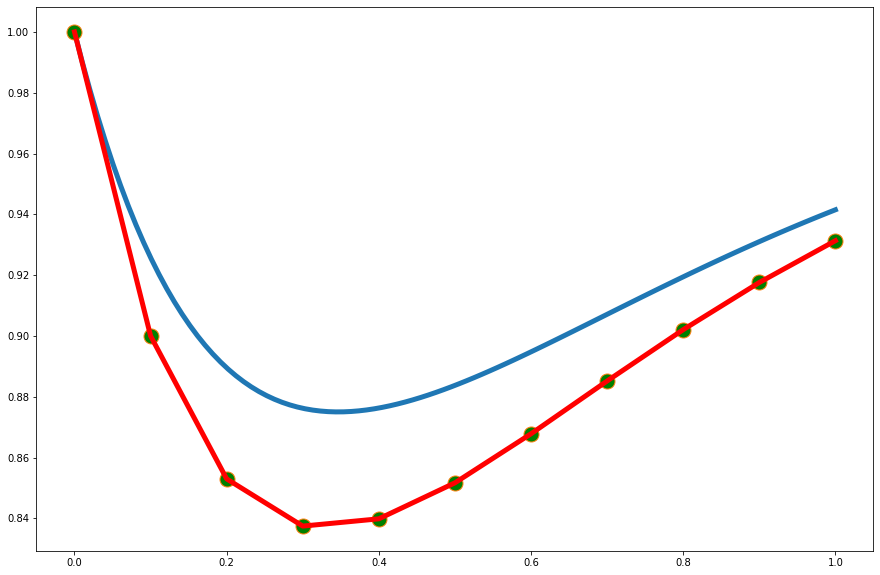

In [3]:
plot_function([x0,xn],fun)

xp=np.arange(x0,xn+h,h)
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')
plt.plot(xp,np.polyval(linterp(xp,y),xp),linewidth=5,color='r')

## Fromula za Ojlerov metod
#### Sada kada znamo na koji način, pomoću numeričkih metoda rešavamo ODJ, pokazaćemo kako funkcioniše Ojlerov metod.
#### Ojlerov metod oslanja se na prva dva člana Tejlorovog reda da aproksimira funkciju $y(x)$:
#### $$f(x_0+h)=f(x_0)+f'(x_0)h+O(h^2)+...$$
#### Vidimo da nam za izračunavanje drugog člana treba prvi izvod funkcije. Na koji način ga dobijamo?
#### Upravo diferencijalna jednačina nam daje prvi izvod funkcije za koju god tačku želimo.
#### Ako u Tejlorov red zamenimo diferencijalnu jednačinu $f(x,y)$ dobijamo formulu za Ojlerov metod:
#### $$f(x_0+h)=f(x_0)+hf(x_0,y_0)+O(h^2)+...$$
#### Ako sada sada uvedemo oznaku $y(x)$ umesto $f(x)$ i uvedemo oznaku za iteracije dobijamo sledeću formulu:
### $$y(x_{i+1})=y(x_i)+hf(x_i,y_i)$$
#### gde je $y(x)$ funkcija čija je diferencijalna jednačina data sa $f(x,y),y(x_0)$, a $h$ proizvoljno odabrani korak.
#### Pre nego što primenimo Ojlerov metod na primer, objasnićemo  ga i pomoću grafika.
#### Na slici ispod dat je prvi korak Ojlerovog metoda.

# <center><img src="Ojlerov_metod_1.png" width="800" height="800"></center>

#### Sa slike se vidi da koristimo tangentu u početnoj tački $y(x_0)$. Za tangentu nam treba prvi izvod funkcije $y(x)$ u tački $x_0$. Njega dobijamo pomoću diferencijalne jedančine i iznosi $f(x_0,y_0)$. Koristimo onda tangentu da se pomerimo za korak $h$ po njoj. Na taj način dobijamo sledeću tačku $y(x_1)$.
#### Na sledećoj slici dat je drugi korak metoda.

# <center><img src="Ojlerov_metod_2.png" width="600" height="600"></center>

#### Sa slike se vidi da metod možemo da primenjujemo iterativno koliko god koraka želimo. Rezultat je skup vrednosti $y$ kao na slici ispod.  (Redni brojevi slika su iz udžbenika i možete ih ignorisati).

# <center><img src="Ojlerov_metod_3.png" width="800" height="800"></center>

#### Primenjujemo sada Ojlerov metod na primer $f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$, za $h=0.1$.
#### $y(0.1)=y(0)+0.1f(0,1)=1+0.1\cdot(2-e^{-4 \cdot 0}-2\cdot1)=0.90$
#### $y(0.2)=y(0.1)+0.1f(0.1,0.9)=0.9+0.1\cdot(2-e^{-4 \cdot 0.1}-2\cdot0.9)=0.85$
#### Prikazaćemo sada grafički jedan korak Ojlerovog metoda baš za ovaj primer, a nakon toga pišemo kod za Ojlerov metod.

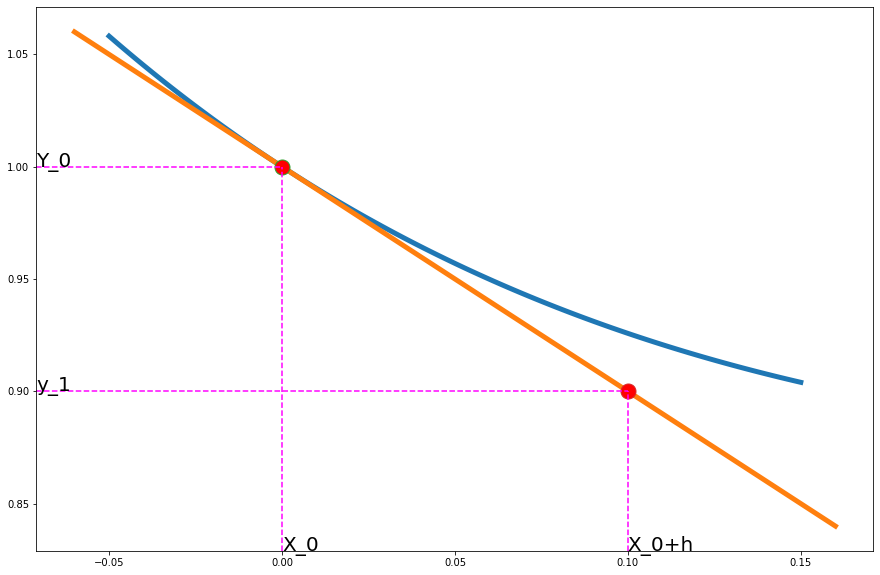

In [4]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=5
h=0.1
plot_euler_step(x0,y0,h,ode)

In [5]:
def ojler(x0,xn,y0,h,odj):
    x = np.arange(x0,xn+h,h)
    n = len(x)
    
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(1,n):
        y[i] = y[i-1] + h * odj(x[i-1], y[i-1])
    
    return y

#### Pozivamo funkciju za primer $f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$, za $h=0.1$.

In [6]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
x0=0
y0=1
xn=1
h=0.1
y=ojler(x0,xn,y0,h,ode)
print(y)
y_ojler=y

[1.         0.9        0.852968   0.8374415  0.83983378 0.85167737
 0.86780837 0.8851749  0.90205891 0.91757091 0.93132436]


#### Prikazujemo tačke koje smo dobili.

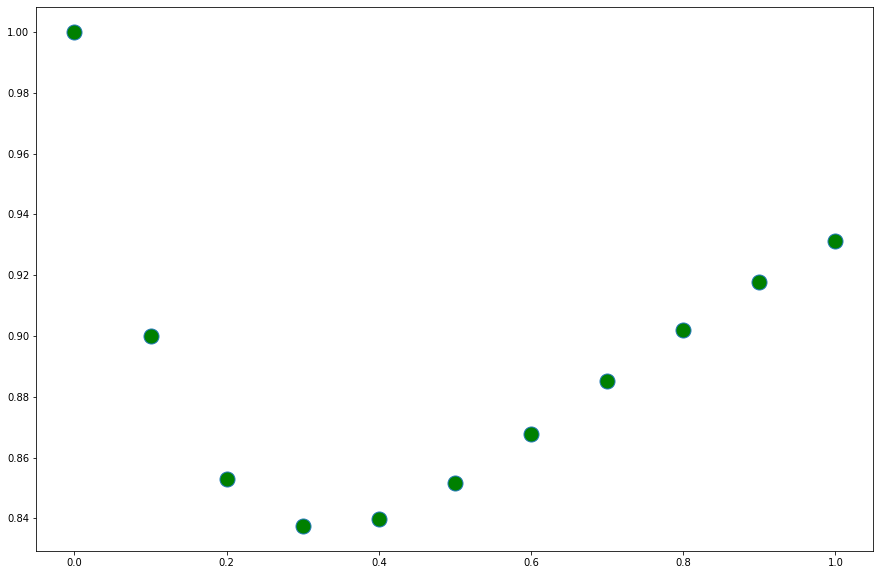

In [7]:
plt.plot(np.arange(x0,xn+h,h),y,'o',markersize=15,markerfacecolor='g')

#### Interpoliramo tačke i prikazujemo polinom.

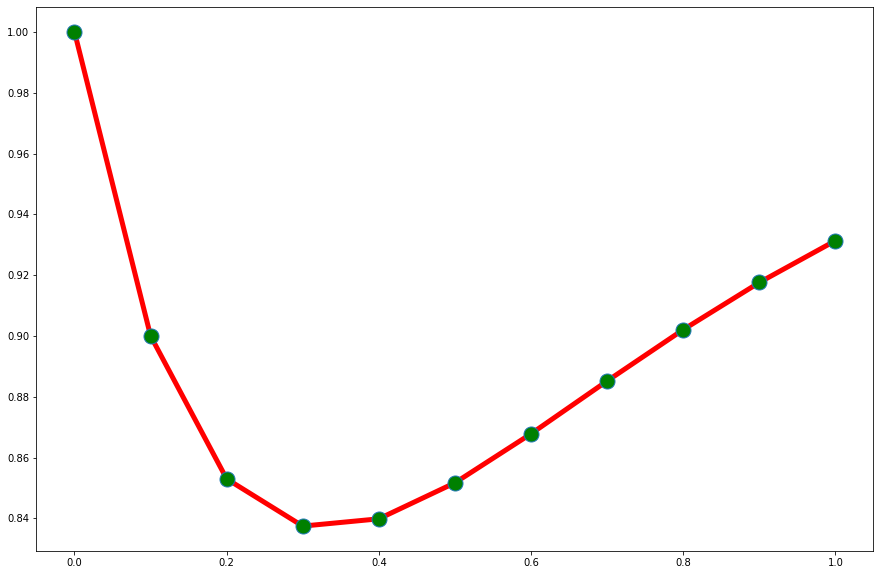

In [8]:
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')

#### Prikazujemo sada i tačno rešenje $y(x)=1+\frac{1}{2}e^{-4x}-+\frac{1}{2}e^{-4x}$ plavom bojom.

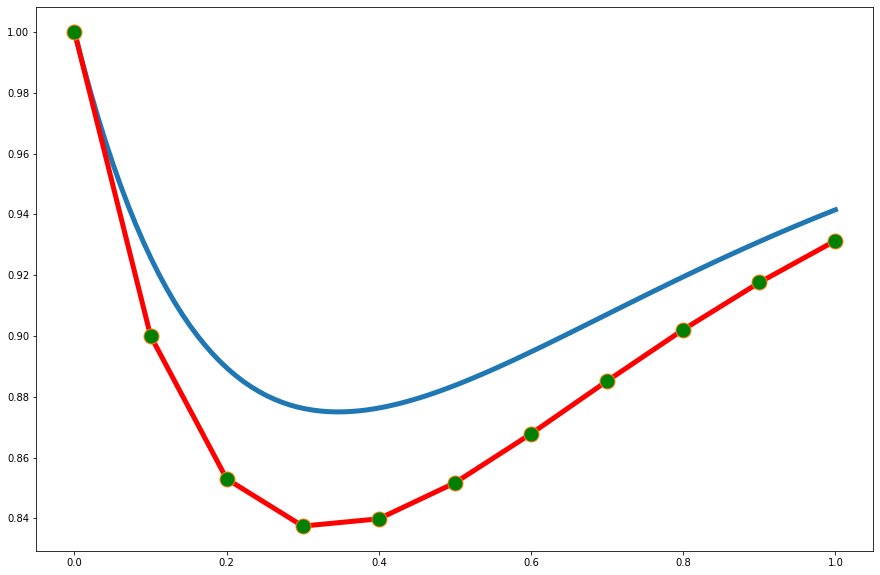

In [9]:
plot_function([x0,xn],fun)
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')

#### Vidimo da se rezultat Ojlerovog metoda razlikuje od tačnog rešenja, a u nastavku detaljnije pričamo grešci Ojlerovog metoda.
## Greška Ojlerovog metoda
#### Pošto Ojlerov metod koristi prva dva člana Tejlorovog reda:
#### $$f(x_0+h)=f(x_0)+hf(x_0,y_0)+O(h^2)+...$$
#### jasno je da je greška jedne primene Ojlerovog metoda reda:
#### $$O(h^2)$$
#### Greška jedne primene se često zove lokalna greška.
#### Ako metod primenimo $n$ puta za neki korak $h$ od tačke $x_0$ do tačke $x_n=x_0+n \cdot h$ onda važi
#### $$n=\frac{x_n-x_0}{h}$$
#### što je proprocionalno sa $O(\frac{1}{h})$. Grubo gledano (dokaz postoji u udžbeniku) zato je red greške $n$ primena metode:
#### $$O(h)$$
#### Red greške više primena metode često se zove globalni red greške.
#### U nastavku prikazujemo grešku Ojlerovog metoda za primer $f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$. Krećemo sa korakom $h=1$ i smanjujemo ga tako što ga delimo sa 2 dok ne dođemo do koraka $h=0.0001$. Nakon toga poredimo grafik greške i funkcije $f(h)=h$.

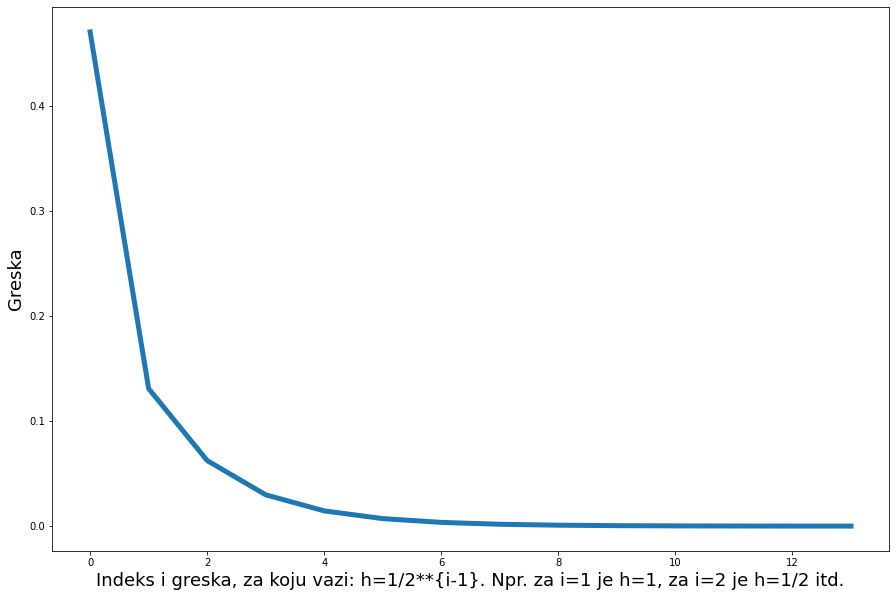

In [10]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y

x0=0
y0=1
xn=1
h=0.1
[errors,sub_intervals]=calculate_error(x0,xn,y0,ode,fun,0.0001,ojler)
errors_ojler=errors

Text(0, 0.5, 'Greska')

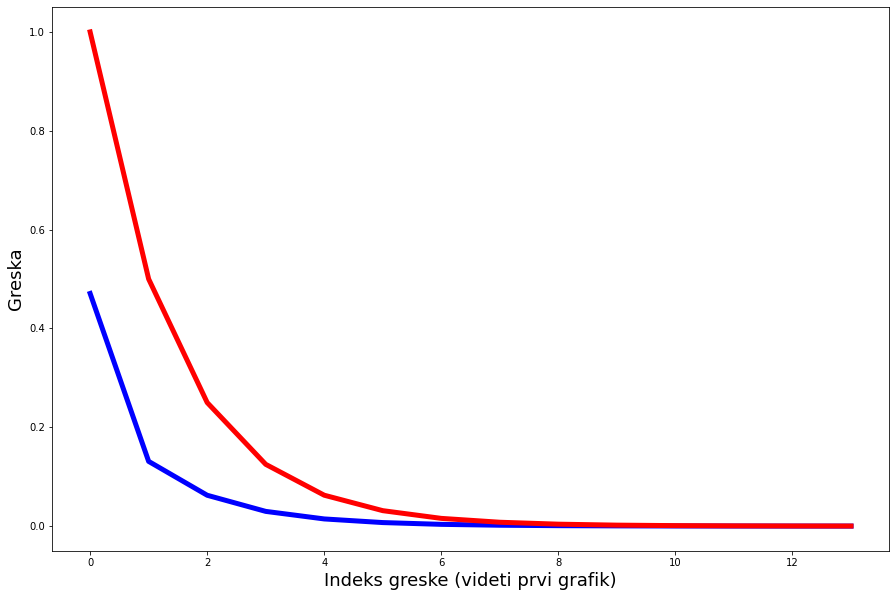

In [11]:
plt.plot(np.arange(0,len(errors)),errors,linewidth=5,color='b')

plt.plot(np.arange(0,len(sub_intervals)),sub_intervals,linewidth=5,color='r')
plt.xlabel('Indeks greske (videti prvi grafik)', fontsize=18)
plt.ylabel('Greska', fontsize=18)

Text(0, 0.5, 'log10(Greska)')

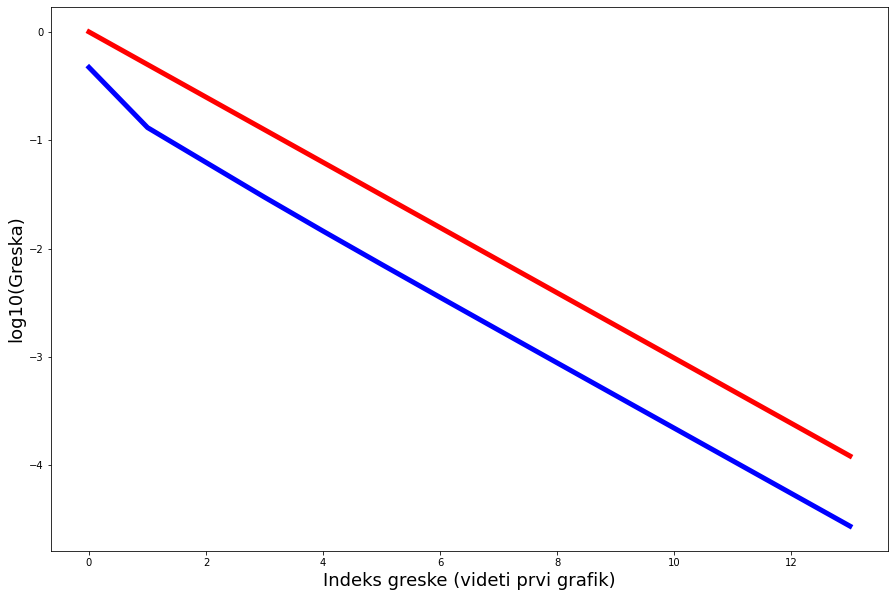

In [12]:
plt.plot(np.arange(0,len(errors)),np.log10(errors),linewidth=5,color='b')

plt.plot(np.arange(0,len(sub_intervals)),np.log10(sub_intervals),linewidth=5,color='r')
plt.xlabel('Indeks greske (videti prvi grafik)', fontsize=18)
plt.ylabel('log10(Greska)', fontsize=18)

#### Sa prethodnih grafika može se videti da ako preplovimo korak $h$ i greška se takođe prepolovi.

#### Videli smo da Ojlerov metod koristi prva dva člana Tejlorovog reda i ima relativno malu tačnost. Logično pitanje bilo bi zašto ne koristimo više članova Tejlorovog reda.
#### Problem je u tome što nam za te članove trebaju redom drugi, treći, četvrti... izvod funkcije, a oni nam nisu dati.
#### U nastavku pokazujemo prvo dva metoda koji daju tačnost koja je jednaka metodama koje koriste i treći član Tejlorovog reda. Nakon toga objašnjavamo na koji način smo postigli takvu tačnost bez korišćenja drugog izvoda.

## Metod srednje tačke
#### Intuitivno, ovaj metod koristi tangentu u tački $x_0 +\frac{1}{2}h$ koja je na polovini intervala $[x_0,x_1]$ da stigne do tačke $y_1$. Ideja je u tome da je nagib te tangente bolja procena kretanja funkcije od tangente u početnoj tački $x_0$.
#### Formula za metod srednje tačke je:
### $$x_{i_{\frac{1}{2}}}=x_i+\frac{1}{2}h$$
### $$y_{i_{\frac{1}{2}}}=y_i +\frac{1}{2}hf(x_i,y_i)$$
### $$y_{i+1}=y(x_i)+hf(x_{i_{\frac{1}{2}}},y_{i_{\frac{1}{2}}})$$
#### gde je $y(x)$ funkcija kojа čija je diferencijalna jednačina data sa $f(x,y),y(x_0)$, a $h$ proizvoljno odabrani korak.
#### Pre nego što primenimo Metod srednje tačke na primer, objasnićemo  ga i pomoću grafika.
#### Na slici ispod dat je prvi korak Metoda srednje tačke.

# <center><img src="Metod_srednje_tačke_1.png" width="900" height="900"></center>

# <center><img src="Metod_srednje_tačke_2.png" width="900" height="900"></center>

#### Primenjujemo sada Metod srednje tačke na primer $f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$, za $h=0.1$.
#### $$x_{1_{\frac{1}{2}}}=x_0+\frac{1}{2}0.1=0.05$$
#### $$y_{1_{\frac{1}{2}}}=y(x_0+\frac{1}{2}0.1)=y(0.05)=y(0)+0.05f(0,1)=1+0.05\cdot(2-e^{-4 \cdot 0}-2\cdot1)=0.95$$
#### $$y(0.1)=y(0)+0.1f(0.05,0.95)=1+0.1\cdot(2-e^{-4 \cdot 0.1}-2\cdot0.95)=0.92$$
#### Prikazaćemo sada grafički jedan korak metoda srednje tačke baš za ovaj primer, a nakon toga pišemo kod za metod srednje tačke.

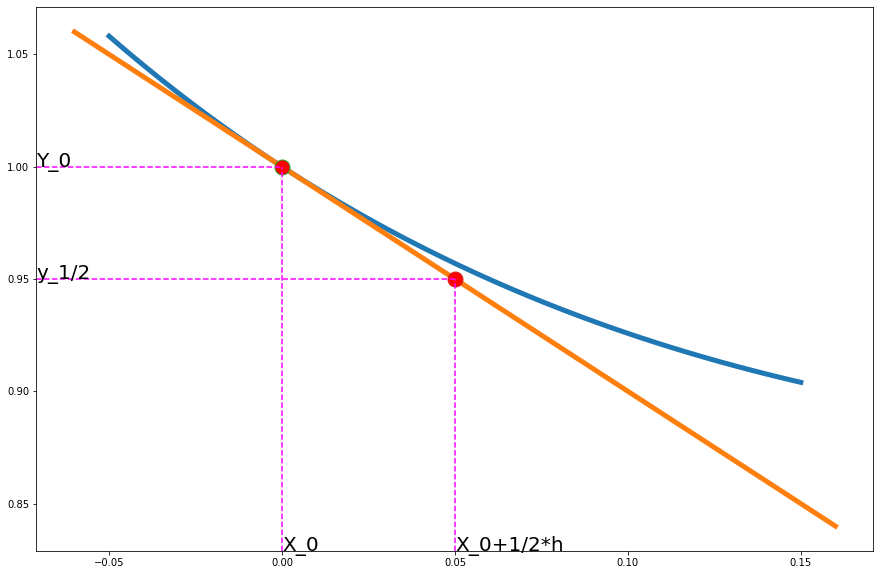

In [13]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=3
h=0.1
plot_mp_step(x0,y0,h,ode,1)

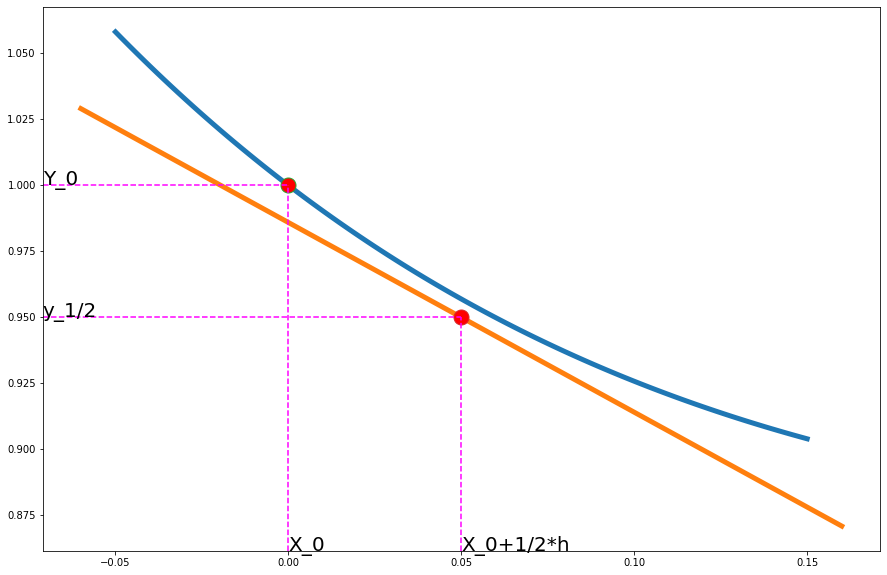

In [14]:
plot_mp_step(x0,y0,h,ode,2)

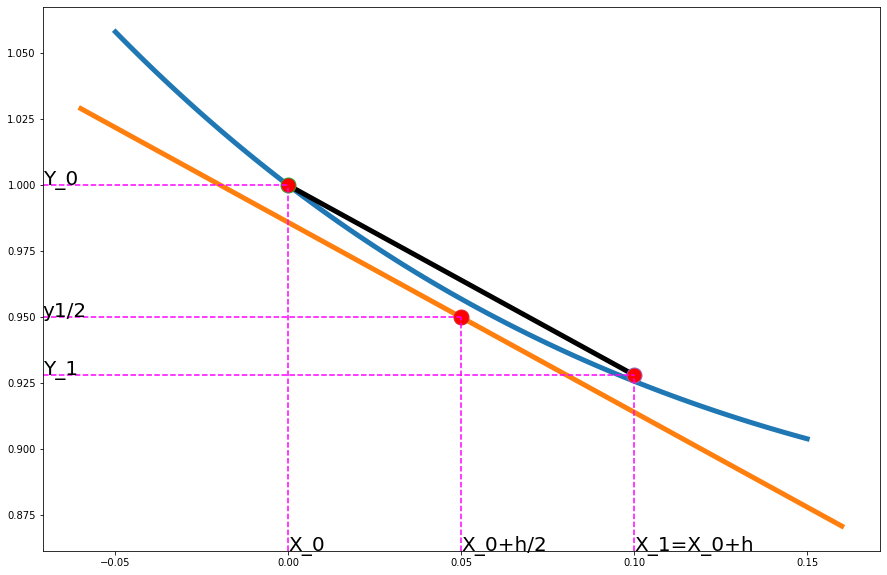

In [15]:
plot_mp_step(x0,y0,h,ode,3)

#### Pišemo sada kod za metod srednje tačke. Ulazni parametri su jednaki kao kod Ojlerovog metoda.

In [16]:
def stacka(x0,xn,y0,h,odj):
    x = np.arange(x0,xn+h,h)
    n = len(x)
    
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(1,n):
        x1_2 = x[i-1] + h/2
        
        y1_2 = y[i-1] + h/2 * odj(x[i-1], y[i-1])
        
        y[i] = y[i-1] + h * odj(x1_2, y1_2)
        
    return y

In [17]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y

x0=0
y0=1
xn=1
h=0.1
y=stacka(x0,xn,y0,h,ode)
y_stacka=y
print(y)

[1.         0.92812692 0.89288612 0.87987196 0.87984725 0.88696382
 0.89758337 0.90949819 0.92141791 0.93263298 0.9427952 ]


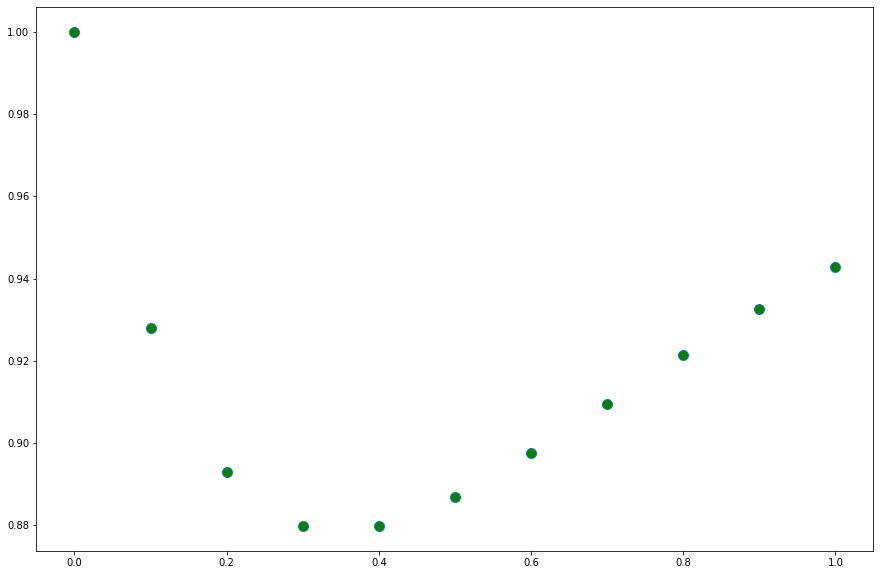

In [18]:
plt.plot(np.arange(x0,xn+h,h),y,'o', markersize=10, markerfacecolor='g')

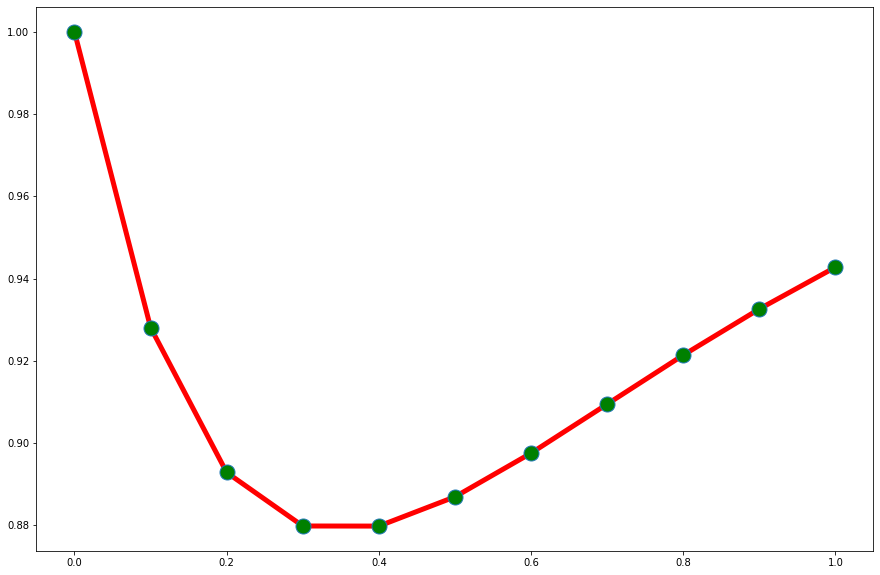

In [19]:
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')

#### Poredimo Ojlerov metod (označen zeleno), metod srednje tačke (označen crveno) i analitičko rešenje (plavo).

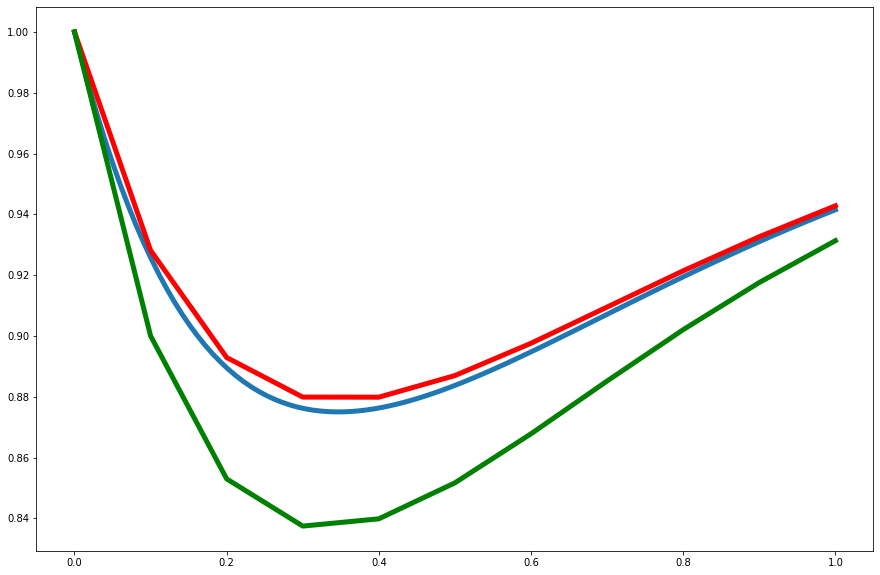

In [20]:
plot_function([x0,xn],fun)
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
p_ojler=linterp(xp,y_ojler)
plt.plot(xp,np.polyval(p_ojler,xp),linewidth=5, color='g')

#### Vidimo da metod srednje tačke ima veću tačnost. Formalno tačnost metoda srednje tačke je reda:
#### $$O(h^2)$$
#### Kasnije objašnjavamo zato red greške ima baš ovu vrednost. Pokazaćemo sada grafike greške za metod srednje tačke.

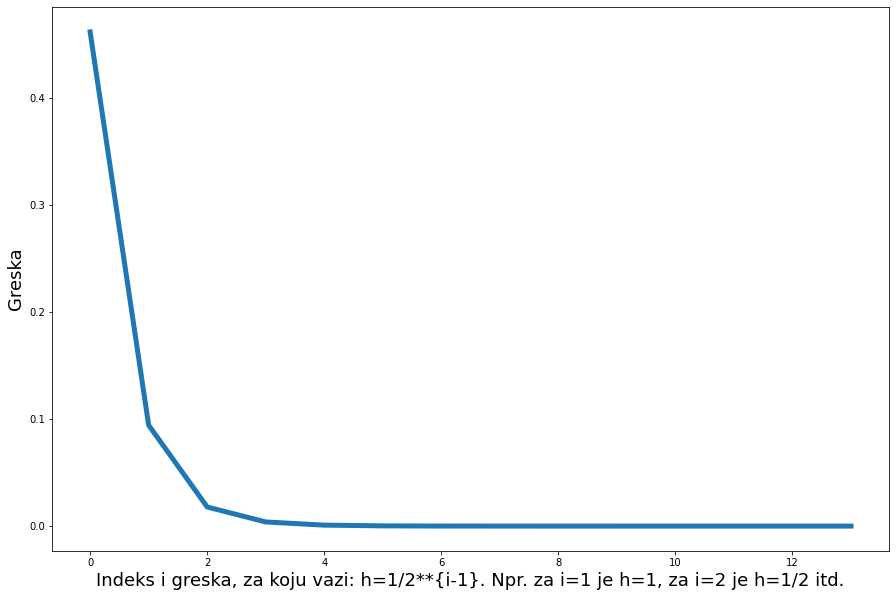

In [21]:
[errors,sub_intervals]=calculate_error(x0,xn,y0,ode,fun,0.0001,stacka)
errors_stacka=errors

#### Poredimo sada grešku metoda srednje tačke (plavo) i funkcije $f(h)=h^2$ (crveno).

Text(0, 0.5, 'Greska')

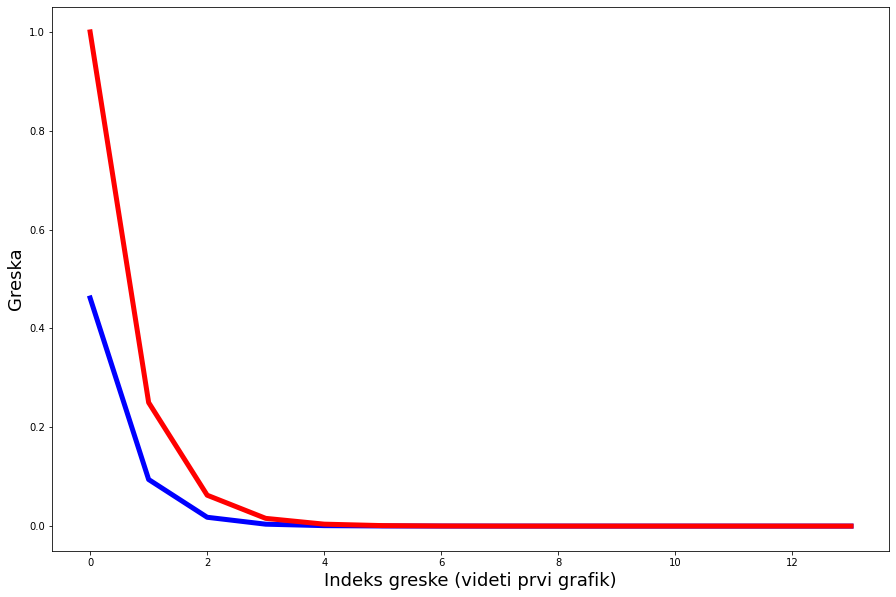

In [22]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.array(sub_intervals)**2,linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

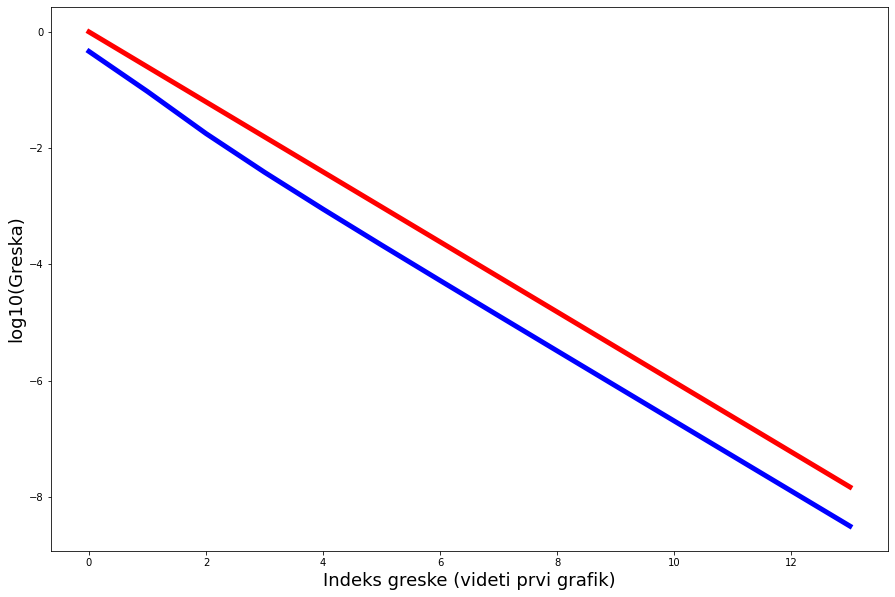

In [23]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.log10(np.array(sub_intervals)**2),linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

#### Poredimo sada grešku metoda srednje tačke (plavo) i Ojlerovog metoda (crveno).

Text(0, 0.5, 'Greska')

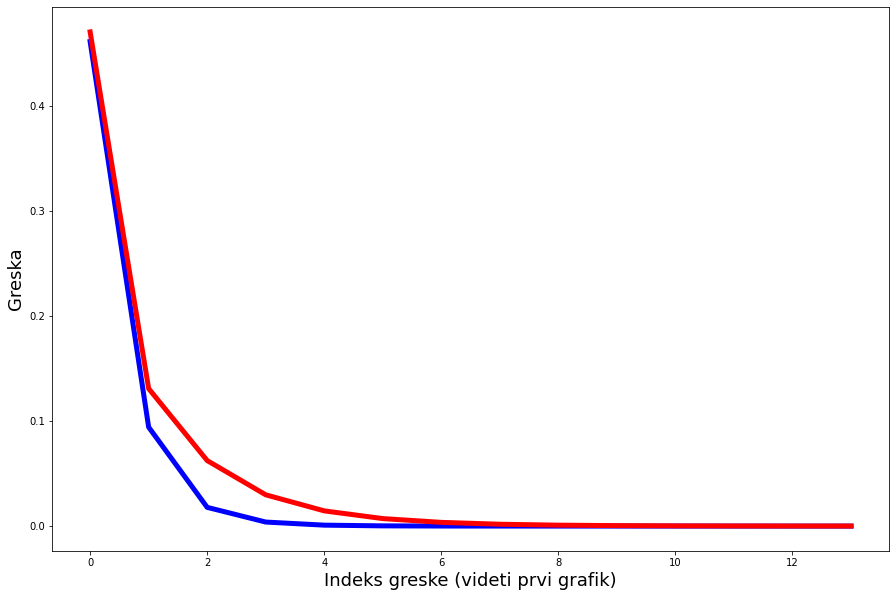

In [24]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='b')
plt.plot(np.arange(len(errors)),errors_ojler,linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

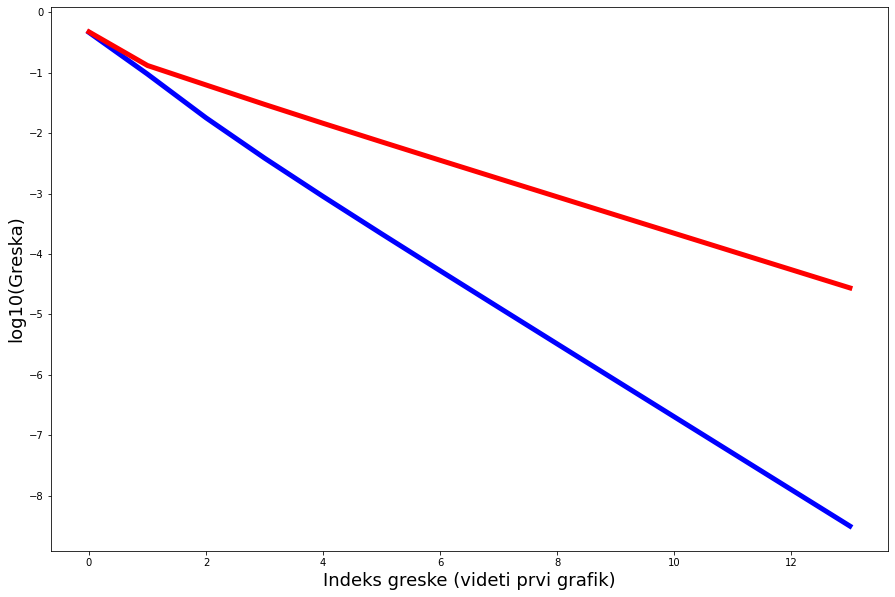

In [25]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='b')
plt.plot(np.arange(len(errors)),np.log10(errors_ojler),linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

## Heunov metod
#### Intuitivno, ovaj metod koristi prosek nagiba tangente u početnoj tački $x_0$ i tangente u sledećoj tački $x_1 = x_0 +h$ da stigne do tačke $y_1$.
#### Formula za Heunov metod je:
### $$y_{i+1}^0=y_i + hf(x_i,y_i)$$
### $$y_{i+1}^1=y_i+h\frac{1}{2}(f(x_i,y_i)+f(x_{i+1},y_{i+1}^0))$$
#### gde je $y(x)$ funkcija kojа čija je diferencijalna jednačina data sa $f(x,y),y(x_0)$, a $h$ proizvoljno odabrani korak.
#### Pre nego što primenimo Heunov metod na primer, objasnićemo ga pomoću grafika.
#### Na slici ispod dat je prvi korak Heunovog metoda.

<center><img src="Heunov_metod.png" width="800" height="800"></center>

#### Primenjujemo sada Heunov metod na primer $f(x,y)=2-e^{-4x}-2y, \hspace{0.5em} y(0)=1$, za $h=0.1$.
#### $$y_{1}^0=y(0.1)^0=y(0)+0.1f(0,1)=1+0.1\cdot(2-e^{-4 \cdot 0}-2\cdot1)=0.90$$
#### $$y_{1}=y(0.1)=y(0)+\frac{0.1}{2}(f(0,1)+f(0.1,0.90))=1+\frac{0.1}{2}\cdot(2-e^{-4 \cdot 0}-2\cdot1+2-e^{-4 \cdot 0.1}-2\cdot0.90)=0.92$$
#### Prikazaćemo sada grafički jedan korak metoda srednje tačke baš za ovaj primer, a nakon toga pišemo kod za metod srednje tačke.

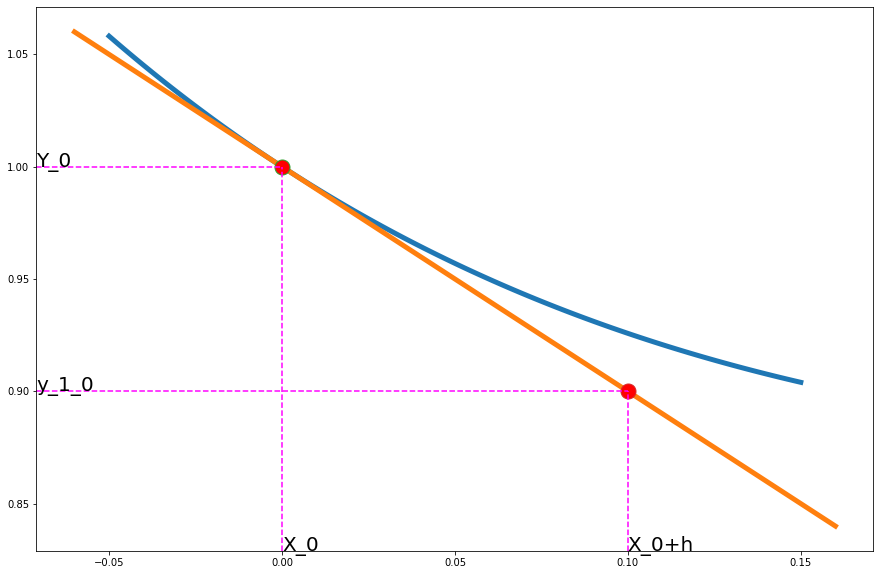

In [26]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=3
h=0.1
plot_heun_step(x0,y0,h,ode,1)

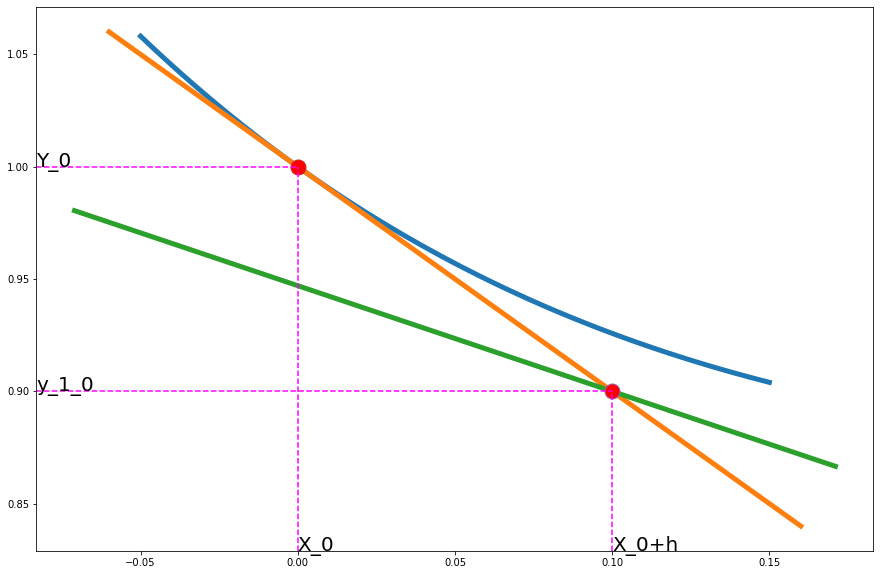

In [27]:
plot_heun_step(x0,y0,h,ode,2)

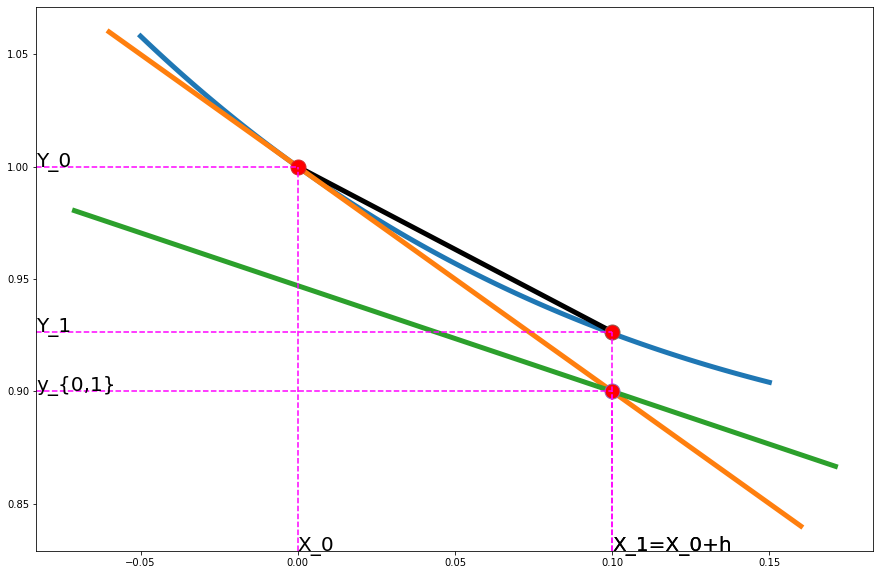

In [28]:
plot_heun_step(x0,y0,h,ode,3)

In [29]:
def heun(x0,xn,y0,h,odj):
    x = np.arange(x0,xn+h,h)
    n = len(x)
    
    y = np.zeros(n)
    y[0] = y0
    
    for i in range(1,n):
        y[i] = y[i-1] + h * odj(x[i-1], y[i-1])
        
        y[i] = y[i-1] + h * ( odj(x[i-1], y[i-1]) + odj(x[i], y[i]) ) / 2
        
    return y

In [30]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y

x0=0
y0=1
xn=1
h=0.1
y=heun(x0,xn,y0,h,ode)
y_heun=y
print(y)

[1.         0.926484   0.89043763 0.87712599 0.87710071 0.88437996
 0.89524226 0.90742943 0.91962162 0.93109305 0.94148757]


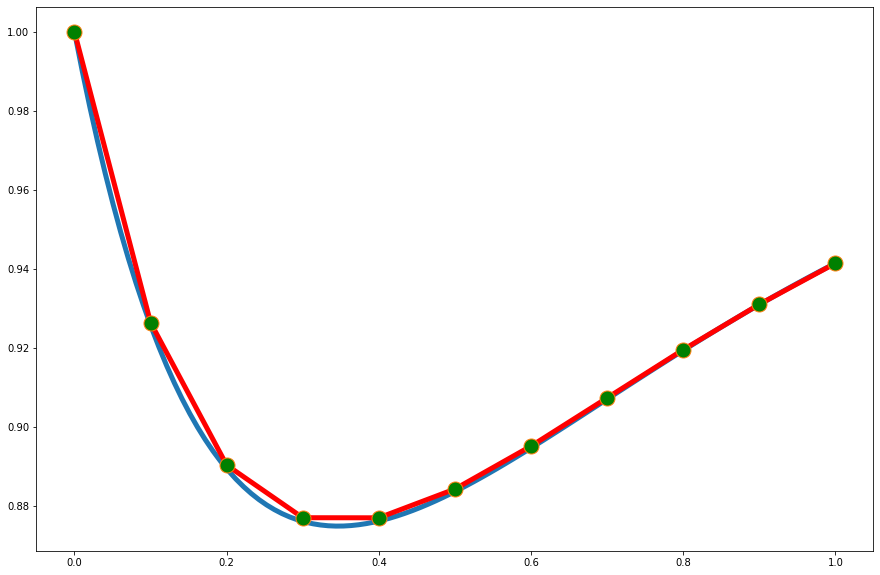

In [31]:
plot_function([x0,xn],fun)
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')

#### Poredimo Ojlerov metod (zeleno), metod srednje tačke (crveno), Henov metod (magenta) i analitičko rešenje (plavo).

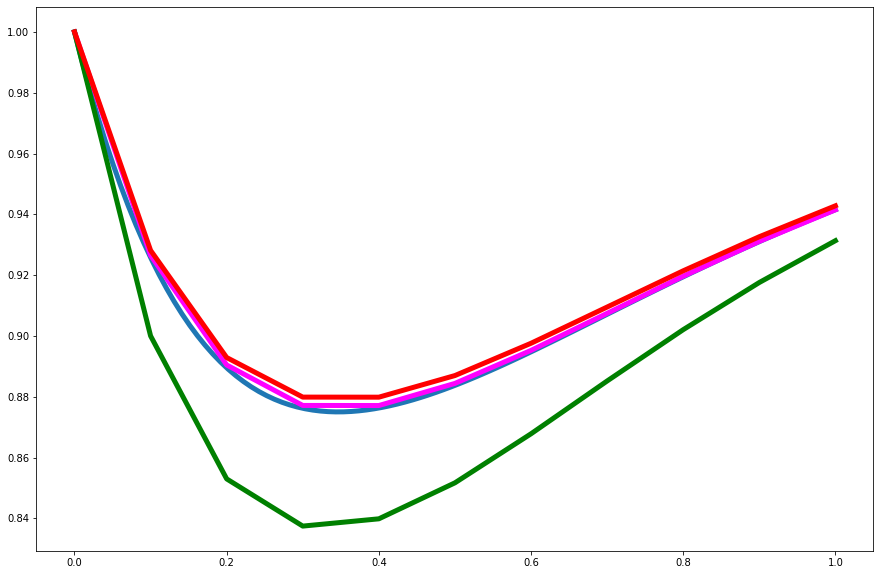

In [32]:
plot_function([x0,xn],fun)
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='magenta')
p_ojler=linterp(xp,y_ojler)
plt.plot(xp,np.polyval(p_ojler,xp),linewidth=5,color='green')
p_stacka=linterp(xp,y_stacka)
plt.plot(xp,np.polyval(p_stacka,xp),linewidth=5,color='red')

#### Vidimo da Heunov metod ima sličnu tačnost kao metod srednje tačke. Formalno tačnost Heunovog metoda je:
#### $$O(h^2)$$
#### Kasnije objašnjavamo zato red greške ima baš ovu vrednost. Pokazaćemo sada grafike greške za Heunov metod.

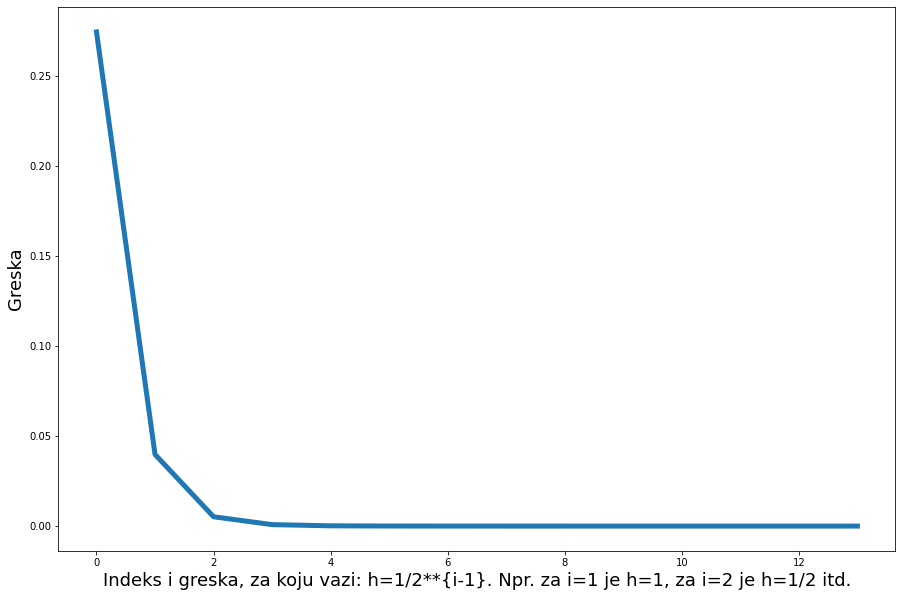

In [33]:
[errors,sub_intervals]=calculate_error(x0,xn,y0,ode,fun,0.0001,heun)
errors_heun=errors

Text(0, 0.5, 'Greska')

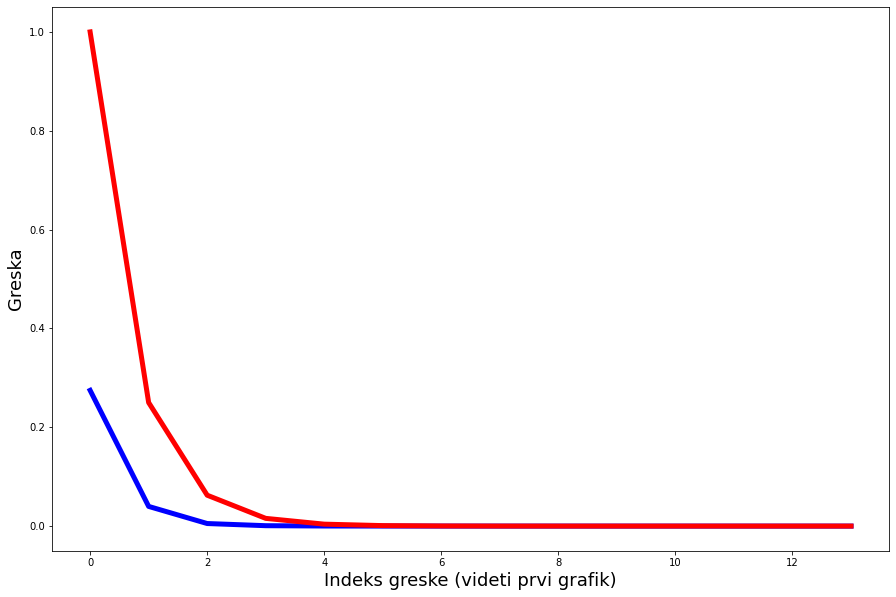

In [34]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.array(sub_intervals)**2,linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

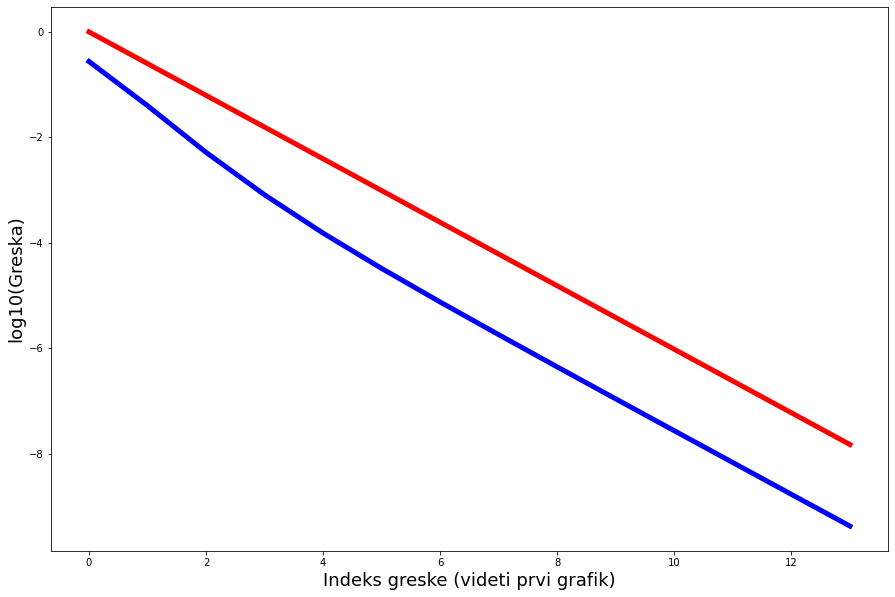

In [35]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.log10(np.array(sub_intervals)**2),linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

#### Poredimo sada grešku Ojlerovog metoda (crveno), metoda srednje tačke (plavo) i Heunovog metoda (magenta).

Text(0, 0.5, 'Greska')

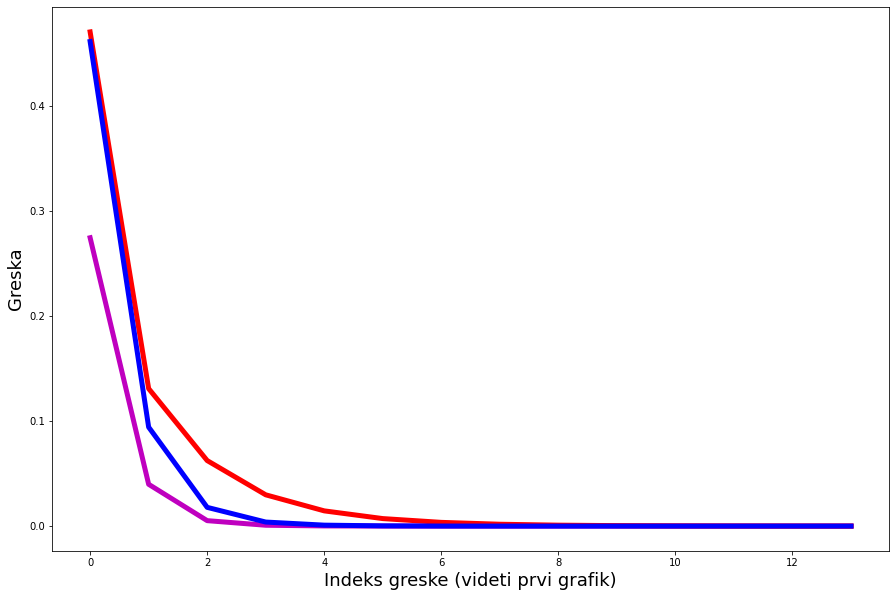

In [36]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='m')
plt.plot(np.arange(len(errors)),errors_ojler,linewidth=5,color='r')
plt.plot(np.arange(len(errors)),errors_stacka,linewidth=5,color='b')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

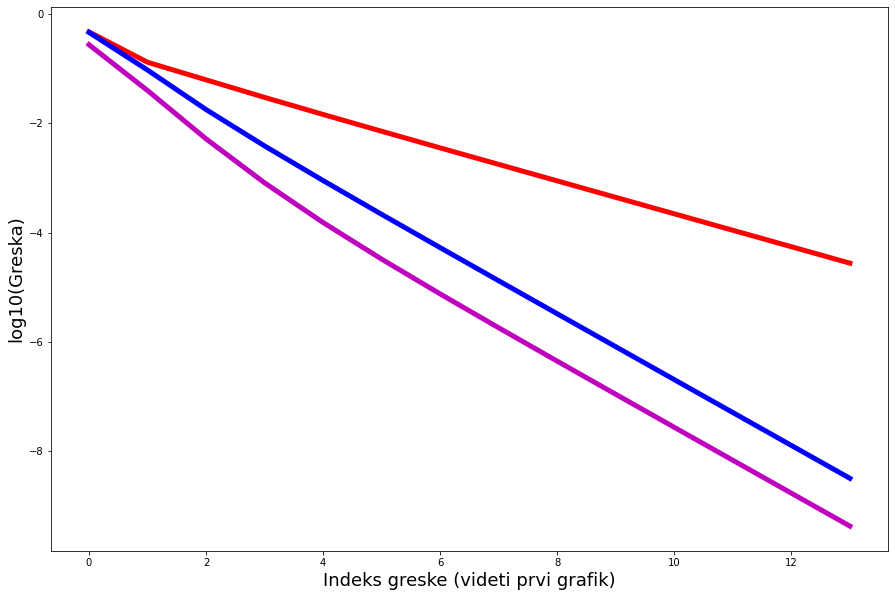

In [37]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='m')
plt.plot(np.arange(len(errors)),np.log10(errors_ojler),linewidth=5,color='r')
plt.plot(np.arange(len(errors)),np.log10(errors_stacka),linewidth=5,color='b')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

## Runge-Kutta metode

#### Kao što smo iz Heunovog i metoda srednje tačke videli moguće je dobiti tačnost većeg reda od $O(h)$ bez korišćenja drugog izvoda. U nastavku ćemo objasniti na koji način su izvedena ta dva metoda.
#### Pretpostavka od koje polaze Runge-Kutta metode je da se prelazak iz tačke $(x_0,y_0)$ u tačku $(x_1,y_1)$ može kompletno parametrizovati. To znači da je dozvoljeno biranje bilo kojih tangenti u bilo kojim tačkama da bi se prelaz uradio. Postavlja se pitanje sa kojim ciljem (ograničenjima) biramo tangente.
#### Cilj je da postignemo veću tačnost odnosno isti rezultat kao kada bi imali drugi, treći, četvrti itd. izvod.
#### Ideja je vrlo slična Gausovoj kvadraturi.
#### Kao što smo kod Gausove kvadrature birali broj tačaka u ovom slučaju prvo biramo koliko ćemo tangenti koristiti pa onda izvodimo metod. Po tome se razlikuje red Runge-Kutta metoda. Detaljno ćemo objasniti Runge-Kutta metode drugog reda.
## Runge-Kutta metode drugog reda
#### Cilj nam je da koristimo dve tangente i da postignemo tačnost kao da koristimo Tejlorov red sa tri člana, tj. kao da imamo drugi izvod.
#### Zapisujemo prvo parametrizovani oblik prelaza od $(x_0,y_0)$ u tačku $(x_1,y_1)$:
### $$y_{i+1}=y_i+w_1 K_1+w_2 K_2$$
### $$K_1=hf(x_i,y_i )$$
### $$K_2=hf(x_i+ \alpha h,y_i+ \beta K_1 )$$
#### , gde su $\alpha,\beta,w_1,w_2$ parametri, tj. nepoznati koeficijenti koje treba da odredimo tako da dobijemo tačnost Tejlorovog reda sa tri člana.
#### Dajemo prvo formulu za Tejlorov red sa tri člana:
### $$y_{i+1}=y_i+hf(x_i,y_i)+\frac{h^2}{2}f'(x_i,y_i)+O(h^3)$$
#### Napomenućemo još jednom da nemamo drugi izvod, tj. nemamo prvi izvod diferencijalne jednačine ($f'(x_i,y_i))$.
#### Sredićemo sada malo formulu za Tejlorov red tako što ćemo razviti $f'(x_i,y_i)$.
### $$f'(x,y)=\frac{\delta f(x,y)}{\delta x}+\frac{\delta f(x,y)}{\delta y}\frac{dy}{dx}=\frac{\delta f(x,y)}{\delta x}+\frac{\delta f(x,y)}{\delta y}f(x,y)$$
### $$y_{i+1}=y_i+hf(x_i,y_i)+\frac{h^2}{2}\frac{\delta f(x_i,y_i)}{\delta x}+\frac{h^2}{2}\frac{\delta f(x_i,y_i)}{\delta y}f(x_i,y_i)$$
#### Ponavljamo sada parametrizovani oblik u jednom redu:
### $$y_{i+1}=y_i+w_1 K_1+w_2 K_2=w_1 hf(x_i,y_i )+w_2hf(x_i+ \alpha h,y_i+ \beta K_1 )$$
#### Da bi prethodnu formulu malo sredili upotrebićemo Tejlorov red za funkciju sa dve promenljive:
### $$f(x_0+h,y_0+k)=f(x_0,y_0) + \frac{\delta f(x_0,y_0)}{\delta x}h+\frac{\delta f(x_0,y_0)}{\delta y}\frac{dy}{dx}k+....$$
### $$K_1=hf(x_i,y_i )$$
### $$f(x_i+\alpha h,y_i+\beta K_1)=f(x_i,y_i) + \frac{\delta f(x_i,y_i)}{\delta x}\alpha h+\frac{\delta f(x_i,y_i)}{\delta y}hf(x_i,y_i)\beta+....$$
### $$y_{i+1}=y_i+w_1 hf(x_i,y_i )+w_2hf(x_i+ \alpha h,y_i+ \beta K_1 )=y_i+w_1 hf(x_i,y_i )+ w_2 h \left[ f(x_i,y_i) + \frac{\delta f(x_i,y_i)}{\delta x}\alpha h+\frac{\delta f(x_i,y_i)}{\delta y}\beta hf(x_i,y_i) \right]$$
### $$y_{i+1}=y_i+(w_1+ w_2)hf(x_i,y_i ) + w_2 h^2 \frac{\delta f(x_i,y_i)}{\delta x}\alpha + w_2 h^2 \frac{\delta f(x_i,y_i)}{\delta y}f(x_i,y_i)\beta$$
#### Izjednačavamo sada paremetrizovani oblik i Tejlorov red da bi videli koje uslove treba da zadovoljavaju parametri (slično kao kod Gausove kvadrature).
## $$y_{i+1}=y_i+(w_1+ w_2)hf(x_i,y_i ) + w_2 \alpha h^2 \frac{\delta f(x_i,y_i)}{\delta x} + w_2 \beta h^2  \frac{\delta f(x_i,y_i)}{\delta y}f(x_i,y_i)$$
## $$y_{i+1}=y_i+hf(x_i,y_i)+\frac{h^2}{2}\frac{\delta f(x,y)}{\delta x}+\frac{h^2}{2}\frac{\delta f(x_i,y_i)}{\delta y}f(x_i,y_i)$$
#### Dobijamo sledeće uslove:
### $$w_1+ w_2=1,\hspace{0.5em}w_2 \alpha=\frac{1}{2},\hspace{0.5em}w_2 \beta=\frac{1}{2}$$
#### Pošto imamo 3 uslova, a 4 parametra, imamo neodređen sistem. To znači da imamo beskonačno mnogo Runge-Kutta metoda drugog reda. Svaki izbor $w_1,w_2,\alpha,\beta$ koji zadovoljava prethodne uslove je validan Rungе-Кutta metod drugog reda i ima globalnu tačnost $O(h^2)$.

#### Recimo da odabremo sada sledeće vrednosti parametra:
### $$\alpha=\beta=1,w_1=w_2=\frac{1}{2}$$
### $$K_1=hf(x_i,y_i )$$
### $$K_2=hf(x_i+ \alpha h,y_i+ \beta K_1 )=hf(x_i+h,y_i+K_1 )$$
### $$y_{i+1}=y_i+w_1 K_1+w_2 K_2=y_i+\frac{1}{2}(K_1+K_2)=y_i+\frac{1}{2}h(f(x_i,y_i)+f(x_i+h,y_i+hf(x_i,y_i))$$
#### Dobili smo Heunov metod. Dakle, vidimo da je on Runge-Kutta metod drugog reda. Na sličan način, ako odberemo $\alpha=\beta=\frac{1}{2},w_1=0=w_2=1$ dobijamo metod srednje tačke.

## Runge Kutta metod četvrtog reda
#### U nastavku ćemo pokazati jedan od Runge Kutta metoda četvrtog reda.
#### Ovaj metod se najčešće koristi u praksi i označava se sa RK4. Koristi kombinaciju četiri tangente i ima tačnost $O(h^4)$.
#### Daćemo prvo formulu, pa nakon toga grafički prikaz i kod.
### $$k_1=f(x_i,y_i )$$
### $$k_2=f(x_i+\frac{h}{2},y_i+\frac{1}{2} k_1 h)$$
### $$k_3=f(x_i+\frac{h}{2},y_i+\frac{1}{2} k_2 h)$$
### $$k_4=f(x_i+h,y_i+k_3 h)$$
### $$y_{i+1}=y_i+\frac{h}{6}(k_1+2k_2+2k_3+k_4 )$$
#### Prikazaćemo sada svaki korak (tangentu) koju RK4 metod koristi.

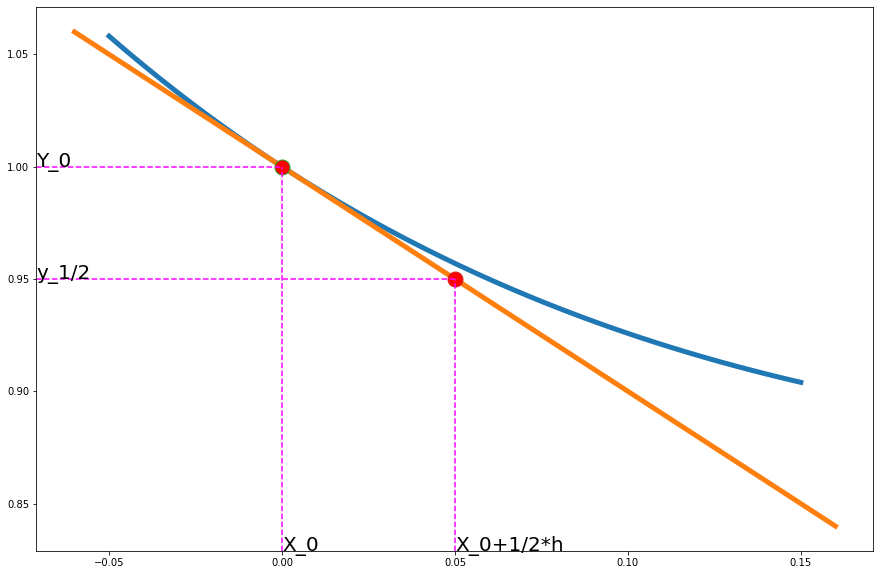

In [38]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=3
h=0.1

plot_rk4_step(x0,y0,h,ode,1)

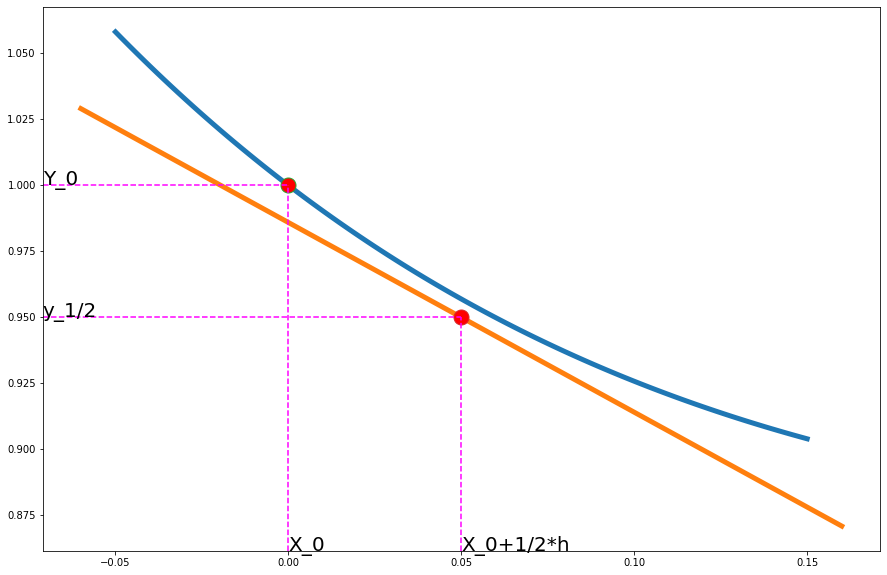

In [39]:
plot_rk4_step(x0,y0,h,ode,2)

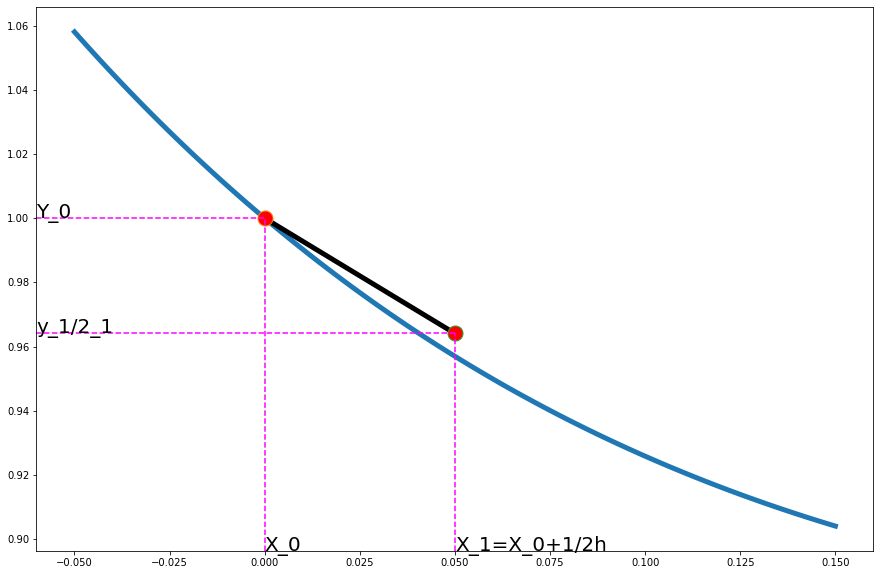

In [40]:
plot_rk4_step(x0,y0,h,ode,3)

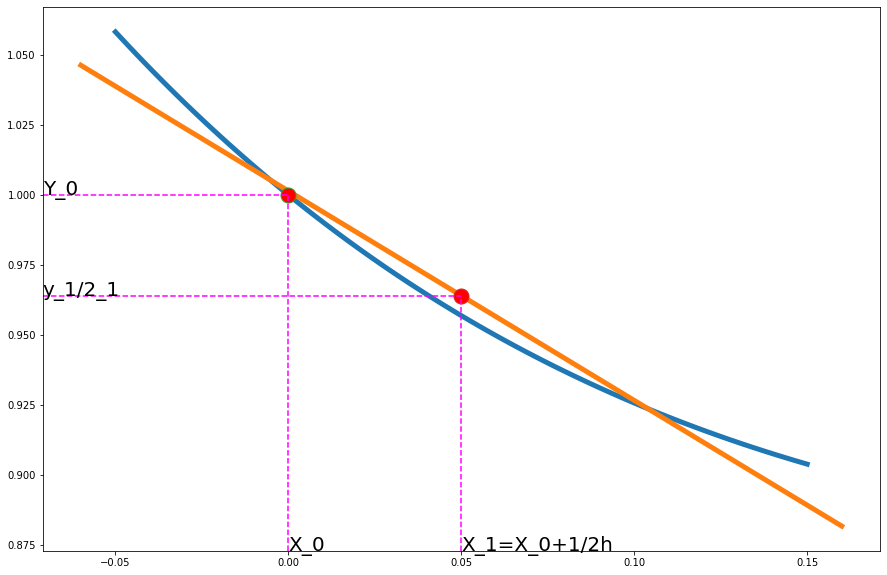

In [41]:
plot_rk4_step(x0,y0,h,ode,4)

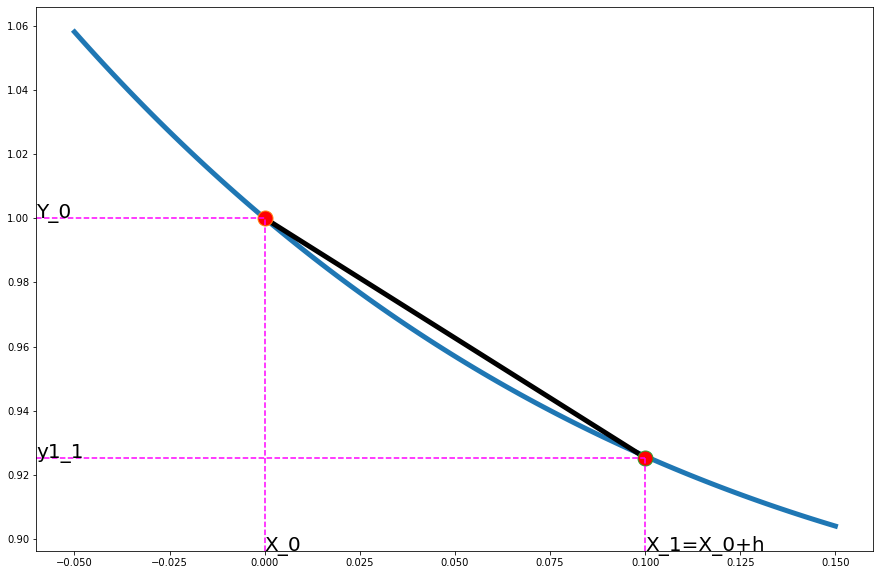

In [42]:
plot_rk4_step(x0,y0,h,ode,5)

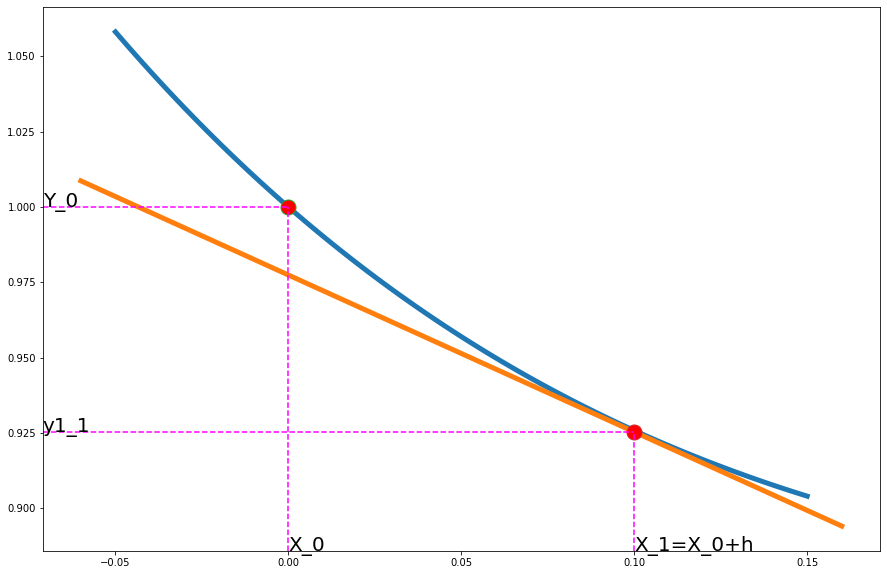

In [43]:
plot_rk4_step(x0,y0,h,ode,6)

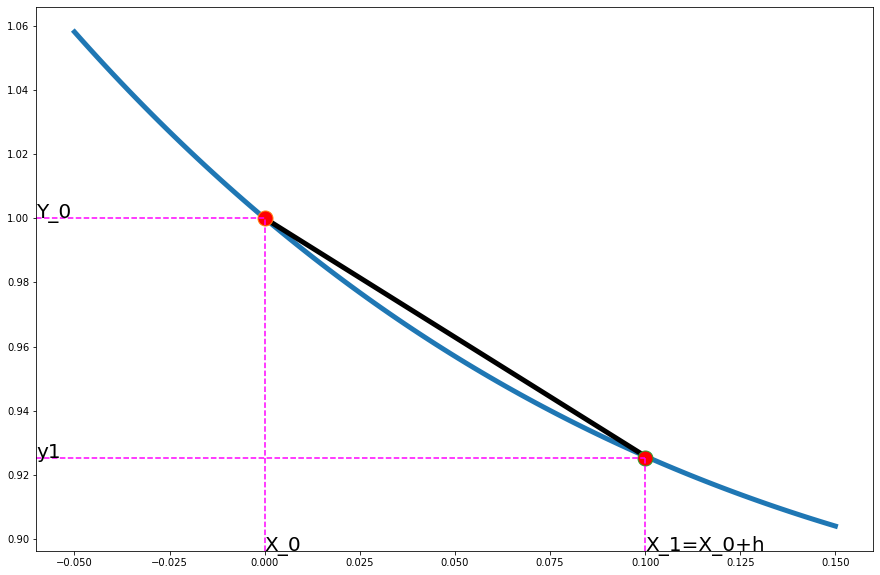

In [44]:
plot_rk4_step(x0,y0,h,ode,7)

#### Prikazaćemo sada sve tangente na jednom grafiku.

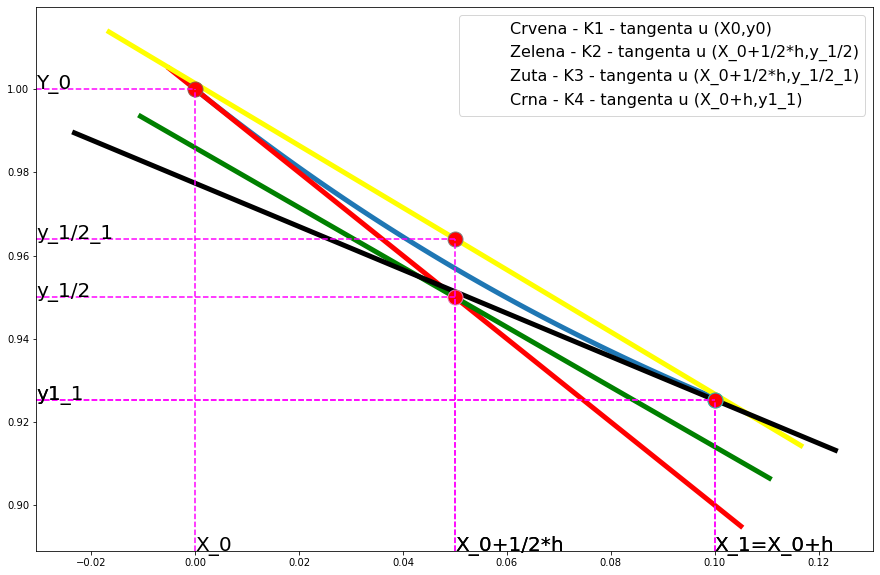

In [45]:
plot_rk4_all(x0,y0,h,ode)
#Prvo imamo tangentu u (x0,y0). Pomocu nje odredimo y_1/2, tako sto se "pomerimo" za h/2
#Onda imamo tangentu u (x0+1/2h,y_1/2). Pomocu nje odredimo y_1/2_1, tako sto se "pomerimo" za h/2
#Onda imamo tangentu u (x0+1/2h,y_1/2_). Pomocu nje odredimo y_1_1, tako sto se "pomerimo" za h
#Onda imamo tangentu u (x0+h,y_1_1). Pomocu nje odredimo "konacno" y_1, tako sto se "pomerimo" za h

#### U nastavku je kod RK4 metoda.

In [46]:
def RungeKutta4(x0,xn,y0,h,odj):
    x=np.arange(x0,xn+h,h)
    n=len(x)
    y=np.zeros(n)
    y[0]=y0
    for i in range(1,n):
        k1 = h * odj(x[i-1], y[i-1])
        k2 = h * odj(x[i-1] + 1/2 * h, y[i-1] + 1/2 * k1)
        k3 = h * odj(x[i-1] + 1/2 * h, y[i-1] + 1/2 * k2)
        k4 = h * odj(x[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [47]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=1
h=0.1
y=RungeKutta4(x0,xn,y0,h,ode)
print(y)

[1.         0.92579791 0.88950913 0.87619629 0.87628854 0.88373216
 0.89476548 0.90710953 0.91943524 0.93101431 0.94149164]


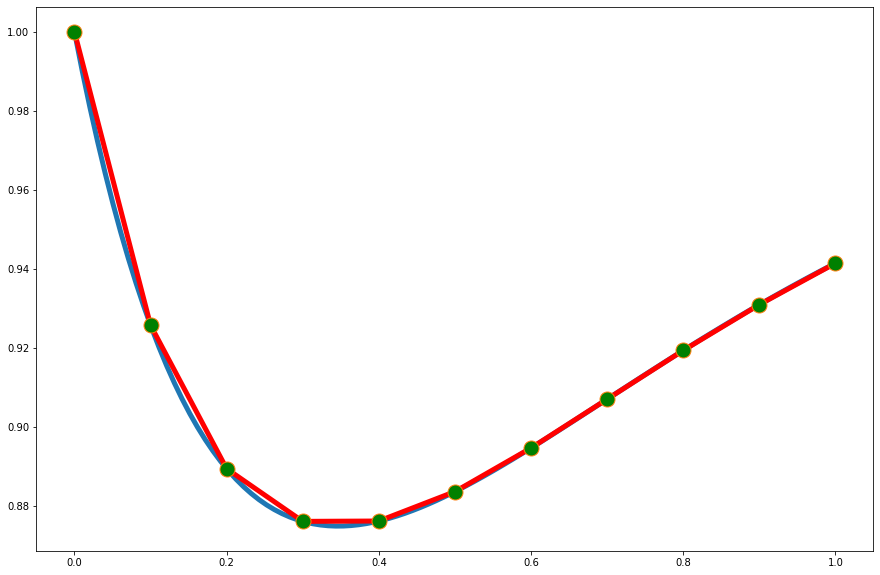

In [48]:
plot_function([x0,xn],fun)
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='r')
plt.plot(xp,y,'o',markersize=15,markerfacecolor='g')

#### Poredimo Ojlerov metod (zelena), metod srednje tačke (crvena), Henov metod (magenta) i RK4 metod (crna).

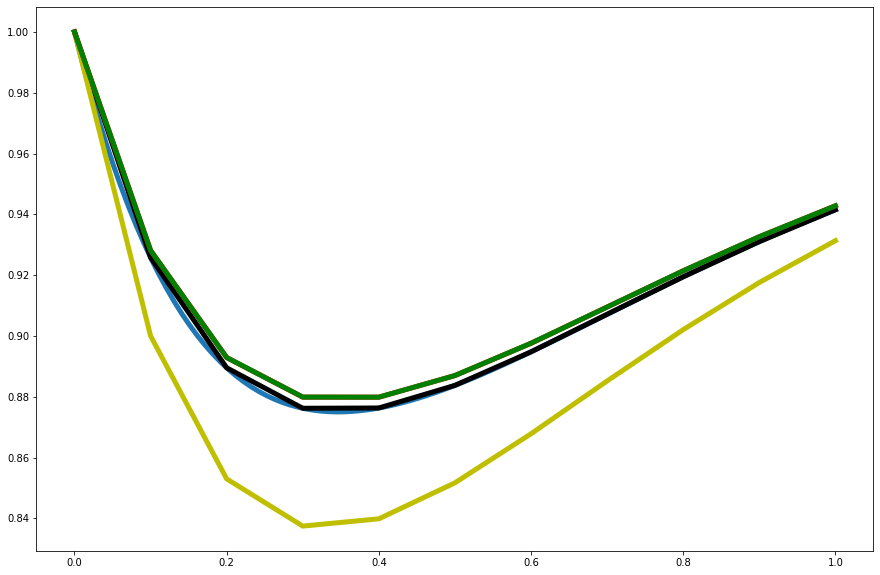

In [49]:
plot_function([x0,xn],fun) #anliticko resenje - plavo
xp=np.arange(x0,xn+h,h)
p=linterp(xp,y)
plt.plot(xp,np.polyval(p,xp),linewidth=5,color='black')#rk4 metod - crno
p_ojler=linterp(xp,y_ojler)
plt.plot(xp,np.polyval(p_ojler,xp),linewidth=5,color='y')#ojelrov metod - zuto
p_stacka=linterp(xp,y_stacka)
plt.plot(xp,np.polyval(p_stacka,xp),linewidth=5,color='r')#metod srednje tacke - crveno
p_heun=linterp(xp,y_heun)
plt.plot(xp,np.polyval(p_stacka,xp),linewidth=5,color='g')#heunov metod - zuto

## Greška RK4 metoda
#### Kao što smo već naveli red greške RK4 metoda je $O(h^4)$. U nastavku grafički prikazujemo grešku i poredimo je sa ostalim metodama.

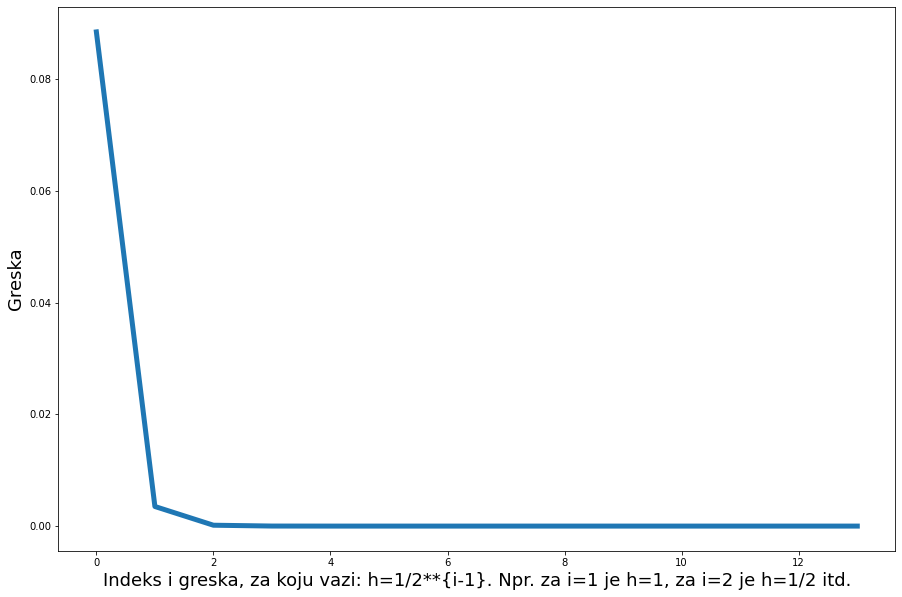

In [50]:
[errors,sub_intervals]=calculate_error(x0,xn,y0,ode,fun,0.0001,RungeKutta4)

Text(0, 0.5, 'Greska')

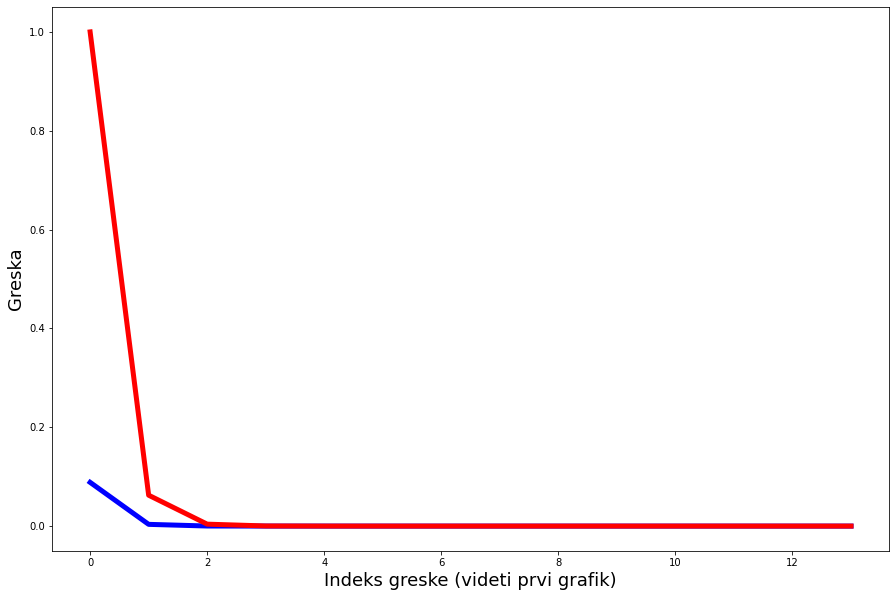

In [51]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.array(sub_intervals)**4,linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

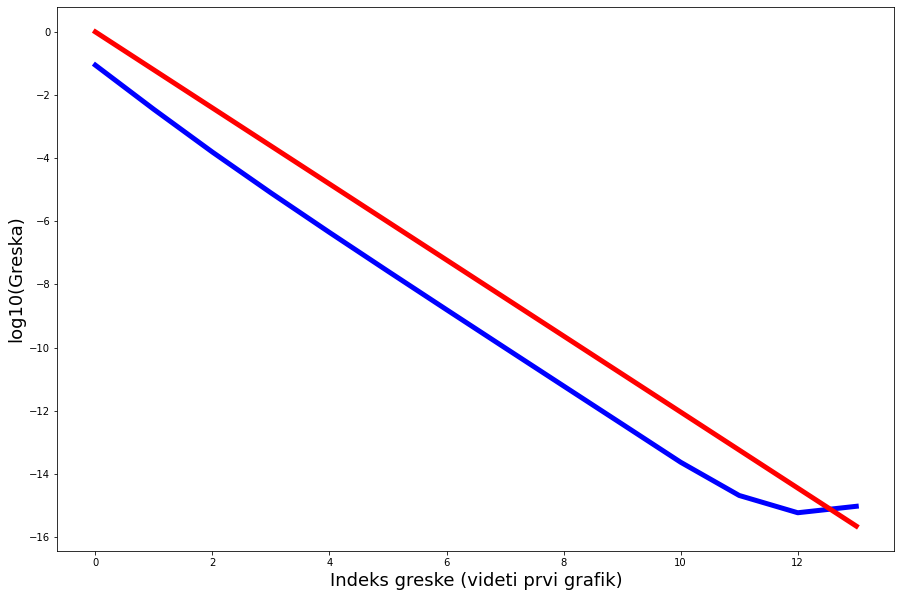

In [52]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='b')
plt.plot(np.arange(len(sub_intervals)),np.log10(np.array(sub_intervals)**4),linewidth=5,color='red')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

#### Poredimo sada grešku Ojlerovog metoda (crvena), metoda srednje tačke (plava), Heunovog metoda (magenta) i RK4 metoda (crna).

Text(0, 0.5, 'Greska')

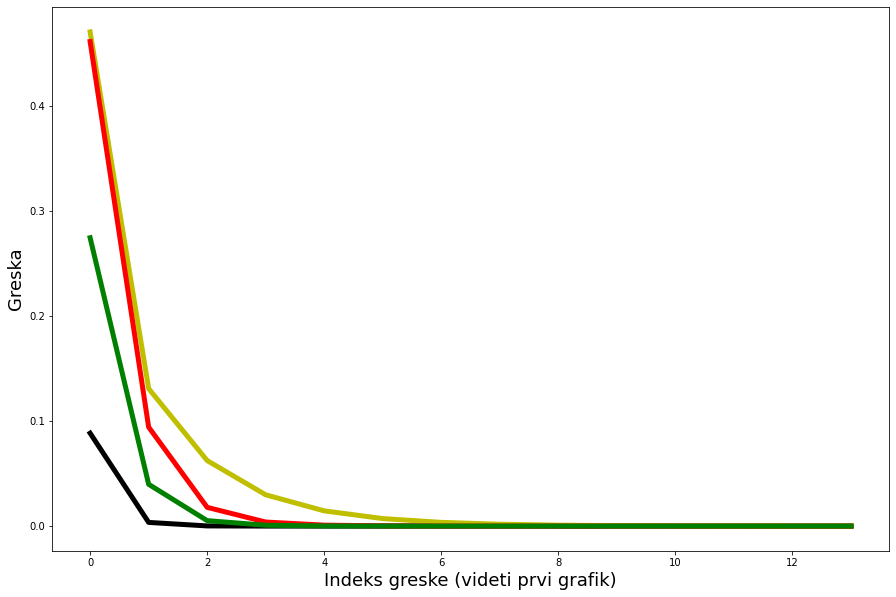

In [53]:
plt.plot(np.arange(len(errors)),errors,linewidth=5,color='black')
plt.plot(np.arange(len(errors)),errors_ojler,linewidth=5,color='y')
plt.plot(np.arange(len(errors)),errors_stacka,linewidth=5,color='red')
plt.plot(np.arange(len(errors)),errors_heun,linewidth=5,color='g')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('Greska',fontsize=18)

Text(0, 0.5, 'log10(Greska)')

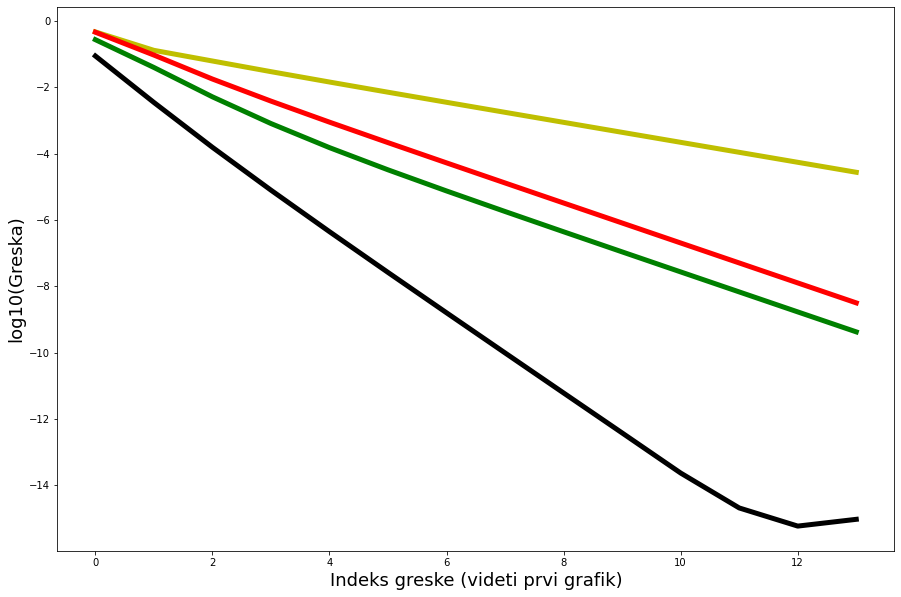

In [54]:
plt.plot(np.arange(len(errors)),np.log10(errors),linewidth=5,color='black')
plt.plot(np.arange(len(errors)),np.log10(errors_ojler),linewidth=5,color='y')
plt.plot(np.arange(len(errors)),np.log10(errors_stacka),linewidth=5,color='red')
plt.plot(np.arange(len(errors)),np.log10(errors_heun),linewidth=5,color='g')
plt.xlabel('Indeks greske (videti prvi grafik)',fontsize=18)
plt.ylabel('log10(Greska)',fontsize=18)

In [66]:
ode=lambda x,y: 2 - np.exp(-4*x) - 2*y
fun=lambda x: 1 + 1/2 * np.exp(-4*x) - 1/2*np.exp(-2*x)

x0=0
y0=1
xn=1
h=0.1
y_rk4=RungeKutta4(x0,xn,y0,h,ode)
print('RK4:')
print(y_rk4)
h=h/2
y_stacka=stacka(x0,xn,y0,h,ode)
y_heun=heun(x0,xn,y0,h,ode)
print('Srednja tačka:')
print(y_stacka)
print('Heun:')
print(y_heun)
h=h/2
y_ojler=ojler(x0,xn,y0,h,ode)
print('Ojler:')
print(y_ojler)

RK4:
[1.         0.92579791 0.88950913 0.87619629 0.87628854 0.88373216
 0.89476548 0.90710953 0.91943524 0.93101431 0.94149164]
Srednja tačka:
[1.         0.95725813 0.92632452 0.90467296 0.89027179 0.88149081
 0.87702533 0.87583432 0.87709004 0.88013705 0.88445885 0.88965078
 0.89539802 0.90145775 0.90764467 0.91381929 0.91987847 0.92574776
 0.93137529 0.93672677 0.94178156]
Heun:
[1.         0.95703173 0.92593427 0.90416803 0.88969058 0.88086308
 0.87637395 0.87517663 0.87643901 0.87950216 0.88384684 0.88906627
 0.89484396 0.90093579 0.90715548 0.91336281 0.91945408 0.92535446
 0.93101179 0.93639162 0.94147318]
Ojler:
[1.         0.975      0.95362906 0.93547934 0.92018492 0.90741767
 0.89688352 0.88831906 0.88148847 0.87618082 0.87220754 0.86940018
 0.86760839 0.86669812 0.86654992 0.8670575  0.86812637 0.86967264
 0.87162192 0.87390835 0.87647371 0.87926665 0.8822419  0.88535973
 0.88858527 0.89188806 0.89524153 0.89862262 0.90201135 0.90539053
 0.90874542 0.91206347 0.91533407 0.

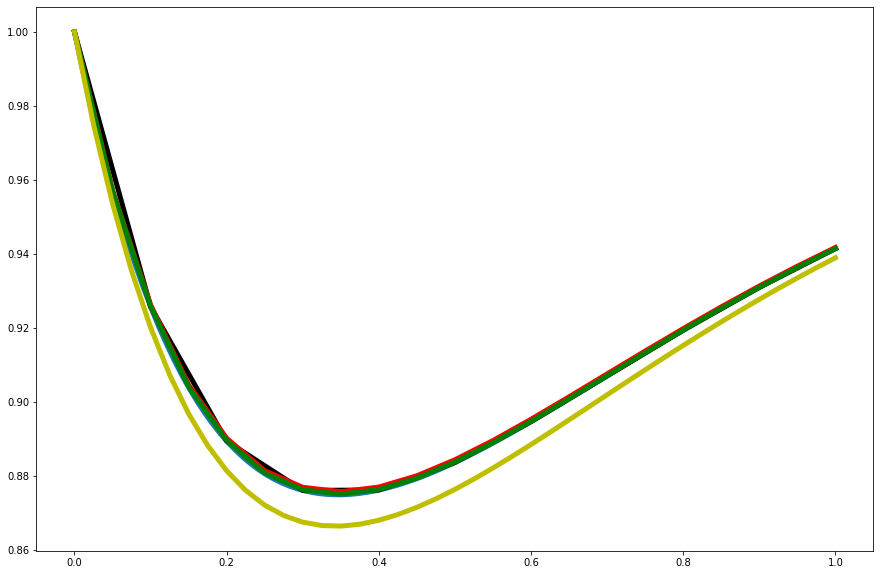

In [71]:
x0=0
xn=1
h=0.1

plot_function([x0,xn],fun) #anliticko resenje - plavo

xp=np.arange(x0,xn+h,h)

plt.plot(xp,y_rk4,linewidth=5,color='black')#rk4 metod - crno

h=h/2
xp=np.arange(x0,xn+h,h)

plt.plot(xp,y_stacka,linewidth=5,color='r')#metod srednje tacke - zeleno

plt.plot(xp,y_heun,linewidth=5,color='g')#heunov metod - crveno

h=h/2
xp=np.arange(x0,xn+h,h)

plt.plot(xp,y_ojler,linewidth=5,color='y')#ojlerov metod - zuto